In [1]:
from core import process, ModelEnum
dir =  "/Users/sherryyang/Documents/wiggins-lab/data/data_master/data4/"
#dir =  "/Users/sherryyang/Documents/wiggins-lab/data/test_phase__"
hier_arr,total_num, mask_arr, edge_df = process(dir, hypermodel=ModelEnum.OMNIPOSE, submodel = 'bact_phase_omni', compute_link = False)


2024-01-10 23:31:40,942 [INFO] ** TORCH GPU version installed and working. **
2024-01-10 23:31:40,942 [INFO] >>bact_phase_omni<< model set to be used
2024-01-10 23:31:40,943 [INFO] ** TORCH GPU version installed and working. **
2024-01-10 23:31:40,944 [INFO] >>>> using GPU


/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-01-10 23:33:04,019 [INFO] 100%|##########| 100/100 [01:22<00:00,  1.21it/s]
2024-01-10 23:33:04,020 [INFO] Segementation: predicting fields finish.
0.11899805068969727
0.0760030746459961
0.07539105415344238
0.0800011157989502
0.08530306816101074
0.06162285804748535
0.07480978965759277
0.0789191722869873
0.07857608795166016
0.08438920974731445
0.06144523620605469
0.07414078712463379
0.07568001747131348
0.07787895202636719
0.07940673828125
0.06202220916748047
0.07683086395263672
0.0775449275970459
0.07854008674621582
0.08043599128723145
0.06299591064453125
0.07715511322021484
0.07877779006958008
0.07995915412902832
0.08356595039367676
0.06369876861572266
0.07867288589477539
0.08282804489135742
0.08174777030944824
0.0854799747467041
0.06334900856018066
0.0792701244354248
0.08038997650146484
0.0833580493927002
0.08659505844116211
0.06386804580688477
0.0789937973022461
0.08317780494689941
0.08282303810119629
0.08660507202148438
0.06599807739257812
0.0799860954284668
0.08299803733825684

KeyboardInterrupt: 

In [4]:
(2,3) 

(2, 3)

In [ ]:

def cluster(shape, coords):

    EPS = 2 ** 0.5
    MIN_SAMPLES = 5

    cood_num = coords.shape[0]
    labels = np.zeros(cood_num)
    mask = -1 * np.ones(shape)
    for c_index in range(cood_num):
        x, y = map(int, coord)
        if (x, y) not in mask: 
            mask[x, y] = set()
        mask[x, y].add(c_index)
    
    queue = []
    label = 0
    for c_index in range(cood_num):
        if labels[c_index] == -1 : queue.append(c_index)
        while not queue.empty():
            x, y = map(int, coords[queue.pop()])
            delta = int(1 + EPS)
            neighbors = set().union(*mask[x-delta:x+delta, y-delta:y+delta].flatten())
            close_neighbors = set()
            for coord in neighbors:
                if np.sqrt(( x- coord[0]) ** 2 + (y - coord[1]) ** 2) <= EPS: 
                    close_neighbors.add(coord)

            if close_neighbors > MIN_SAMPLES:
                queue.extend(close_neighbors)

            labels[c_index] = label

        label += 1

    return labels


NameError: name 'labels' is not defined

In [4]:
a = [1,2,3]
a.extend(1,2,3)

TypeError: list.append() takes exactly one argument (3 given)

In [3]:
a

[1, 2, 3, {1, 2, 3}]

In [ ]:
import omnipose
from cellpose_omni import io, transforms, models, core
from omnipose.utils import normalize99
import util
from config import SEGEMENTATION_PARAMS_OMNIPOSE, SEGEMENTATION_PARAMS_CELLPOSE

use_GPU = core.use_gpu()
model = models.CellposeModel(gpu=use_GPU, model_type = "bact_phase_omni")

imags = util.load(dir, io)
params = SEGEMENTATION_PARAMS_OMNIPOSE

# segementation model predict field (distance field + flow field), but does not compute mask
params['compute_masks'] = True
params['channels'] = [0,0]
_, flows, _ = model.eval(imags, **params)

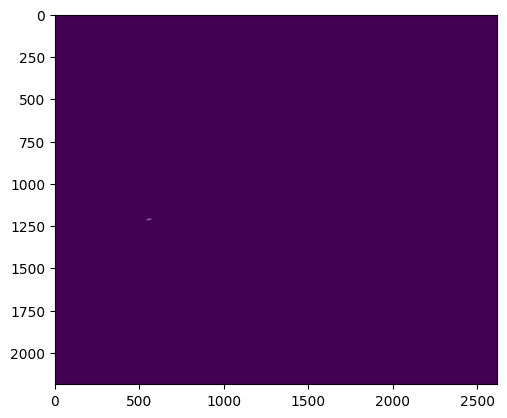

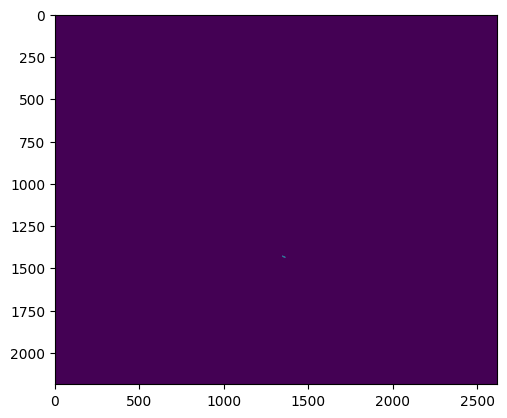

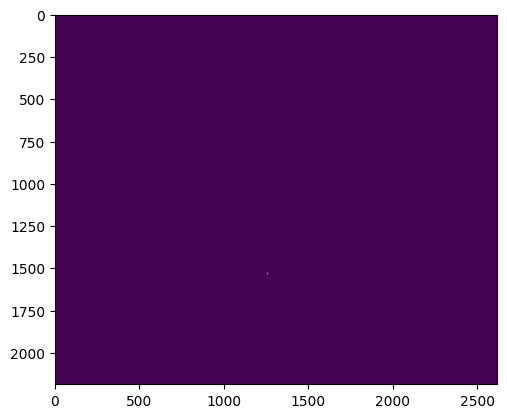

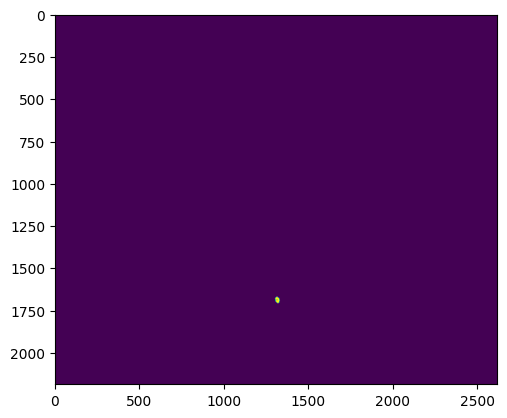

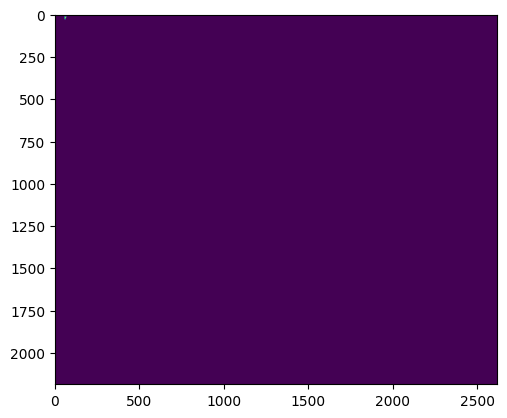

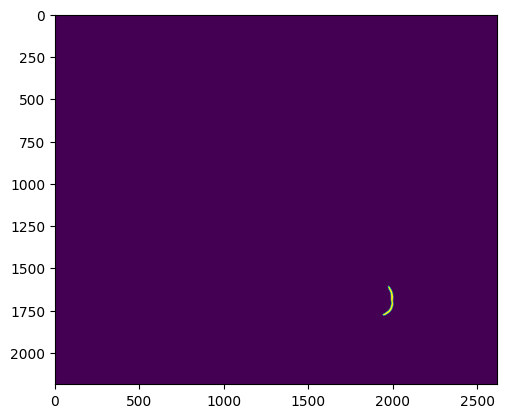

In [9]:
import numpy as np
import matplotlib.pyplot as plt

for hier in hier_arr:
    for node in hier.root.subs:
        if len(node.subs) > 0:
            mask = np.zeros(node.shape)
            mask[node.value[:, 0], node.value[:, 1]] = 1
            plt.imshow(mask)
            plt.show()

In [48]:
store_output(mask_arr, edge_df,dir)

In [41]:
import os
from PIL import Image

def store_output(mask_arr, edge_df, basedir):
    # Create directory if it doesn't exist
    if not os.path.exists(basedir):
        os.makedirs(basedir)

    # Save mask images
    for idx, mask in enumerate(mask_arr):
        mask_image = Image.fromarray(mask.astype(np.uint8), 'L')
        mask_image_path = os.path.join(basedir, f'mask_{idx}.png')
        mask_image.save(mask_image_path)

    # Save DataFrame to CSV
    edge_df.to_csv(os.path.join(basedir, 'edge_data.csv'), index=False)


In [2]:
from tracking import solve
from util import format_output, store_output

n, e, (rows, cols) = solve(hier_arr, total_num, cost_func_name = "distance", do_filter = True)
edges = {(rows[i], cols[i]) for i in e}
mask_arr, edge_df  = format_output(hier_arr, n, edges)

2024-01-08 22:21:08,632 [INFO] Start building up problem
2024-01-08 22:21:45,165 [INFO] 0


ValueError: zero-size array to reduction operation minimum which has no identity

In [11]:
import tracking, core
n, edges = core.run_tracking(hier_arr, total_num, "overlap")

2024-01-08 10:27:26,279 [INFO] Start building up problem


/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2024-01-08 10:27:26,950 [INFO] 4303
2024-01-08 10:27:26,951 [INFO] Start solving problem
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-07
2024-01-08 10:27:27,147 [INFO] MIP problem be set up, start solving
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.0.0 23A344)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4471 rows, 10147 columns and 19009 nonzeros
Model fingerprint: 0x0ddbf201
Variable types: 0 continuous, 10147 integer (10147 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 269 rows and 1762 columns


In [12]:
edges

set()

In [13]:
from tracking import solve
    
n, e, (rows, cols) = solve(hier_arr, total_num, "overlap")

2024-01-08 10:27:50,445 [INFO] Start building up problem


/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2024-01-08 10:27:51,017 [INFO] 4303
2024-01-08 10:27:51,018 [INFO] Start solving problem
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-07
2024-01-08 10:27:51,100 [INFO] MIP problem be set up, start solving
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.0.0 23A344)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4471 rows, 10147 columns and 19009 nonzeros
Model fingerprint: 0x0ddbf201
Variable types: 0 continuous, 10147 integer (10147 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 269 rows and 1762 columns


In [18]:
edges = {(rows[i], cols[i]) for i in e}

In [19]:
edges

{(176, 231),
 (1035, 1124),
 (777, 865),
 (629, 701),
 (828, 910),
 (659, 729),
 (242, 297),
 (681, 753),
 (692, 762),
 (1322, 1423),
 (286, 339),
 (518, 582),
 (308, 363),
 (1334, 1433),
 (846, 941),
 (79, 131),
 (309, 364),
 (341, 396),
 (548, 609),
 (1200, 1289),
 (1190, 1281),
 (342, 397),
 (374, 429),
 (108, 166),
 (375, 430),
 (1234, 1323),
 (407, 462),
 (765, 844),
 (149, 203),
 (171, 227),
 (150, 204),
 (215, 269),
 (654, 725),
 (665, 734),
 (216, 270),
 (655, 726),
 (1307, 1406),
 (666, 735),
 (857, 940),
 (1089, 1183),
 (1090, 1184),
 (1122, 1216),
 (1174, 1263),
 (713, 788),
 (883, 970),
 (1144, 1240),
 (1163, 1253),
 (747, 822),
 (119, 170),
 (750, 827),
 (90, 143),
 (1229, 1319),
 (414, 469),
 (581, 646),
 (584, 651),
 (1251, 1343),
 (591, 659),
 (794, 875),
 (805, 884),
 (1277, 1373),
 (440, 498),
 (1081, 1174),
 (244, 299),
 (1063, 1156),
 (1335, 1435),
 (694, 764),
 (26, 76),
 (59, 110),
 (245, 300),
 (1117, 1212),
 (1169, 1259),
 (1336, 1436),
 (1347, 1445),
 (520, 584

In [7]:
edge_df

Empty DataFrame
Columns: [Source Label, Source Frame, Target Label, Target Frame]
Index: []

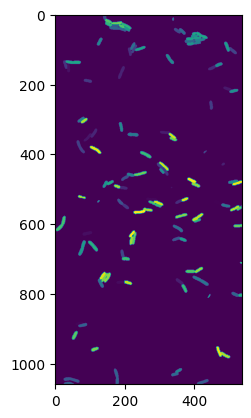

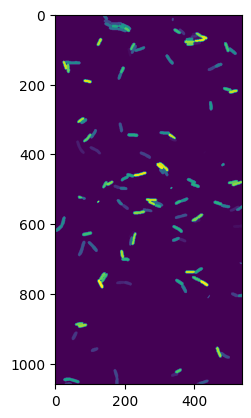

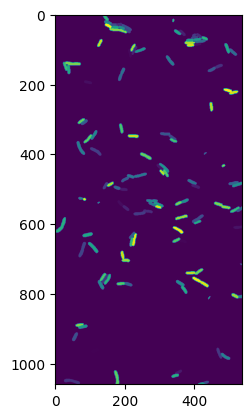

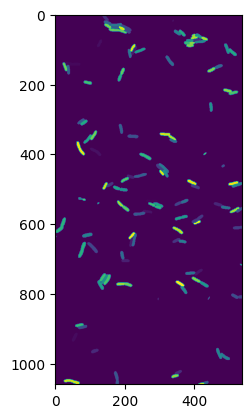

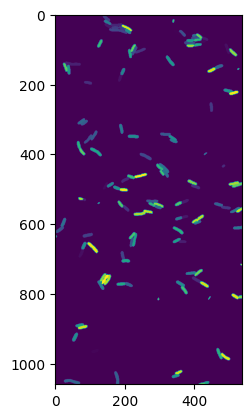

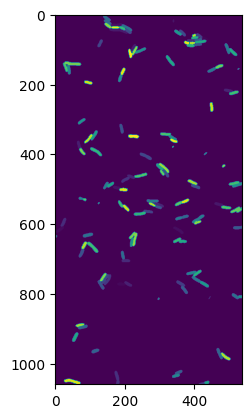

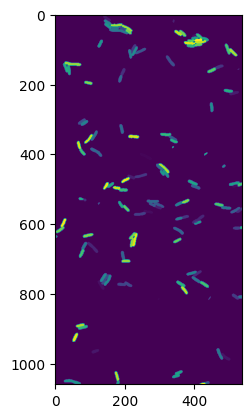

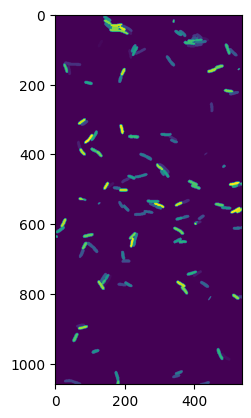

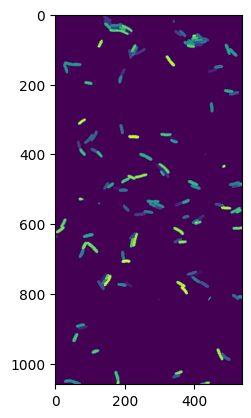

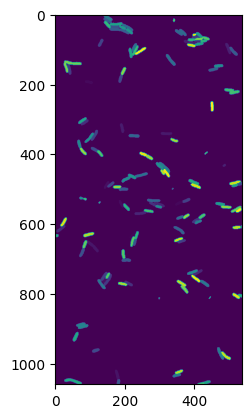

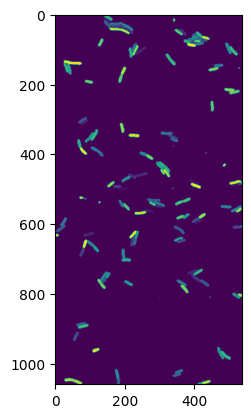

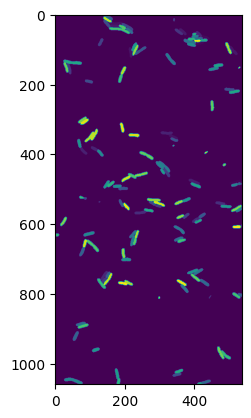

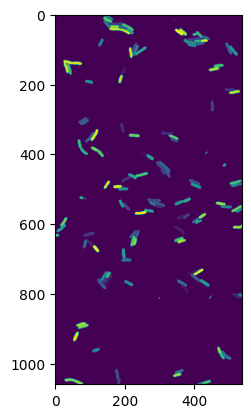

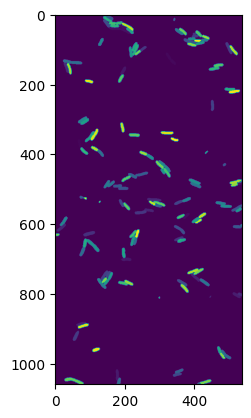

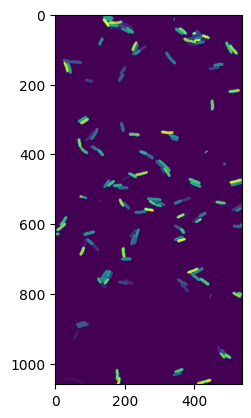

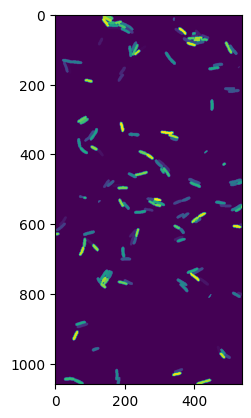

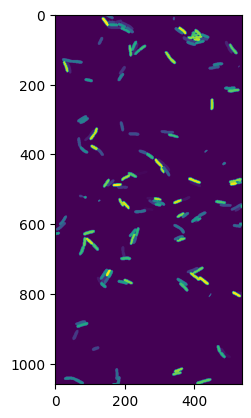

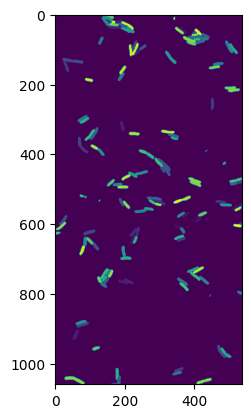

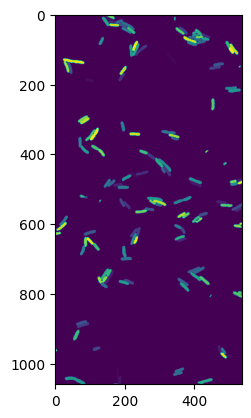

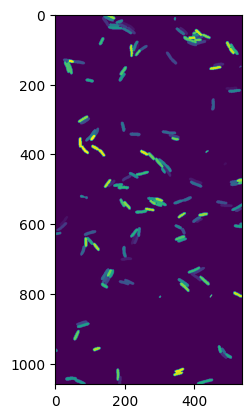

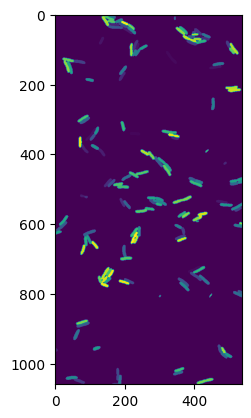

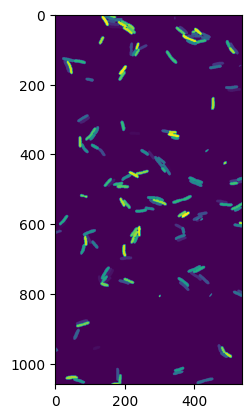

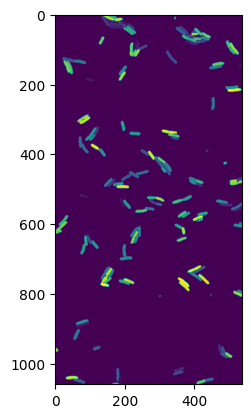

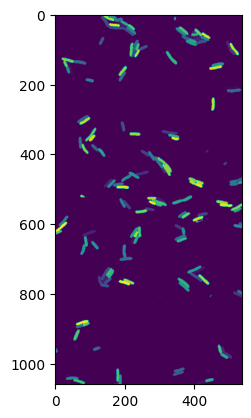

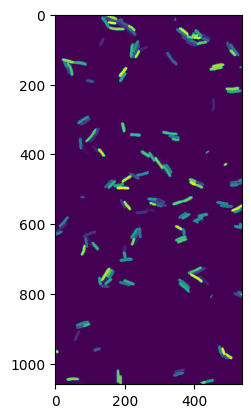

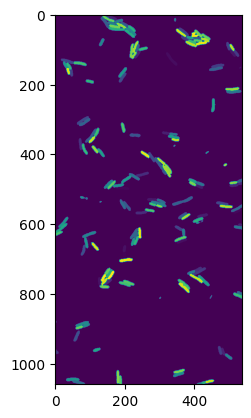

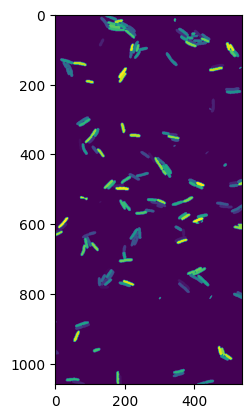

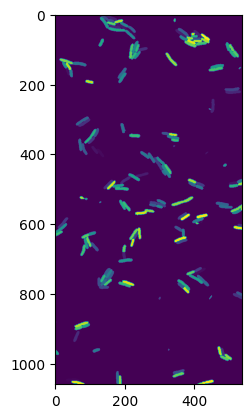

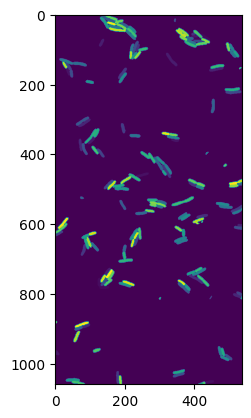

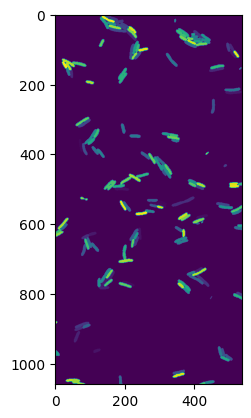

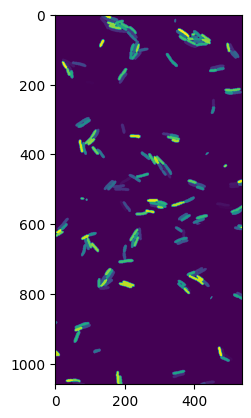

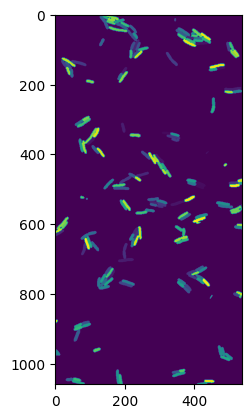

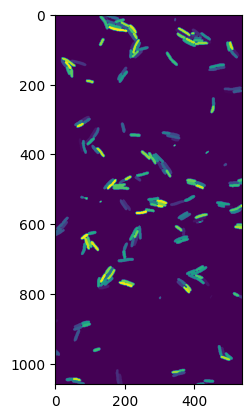

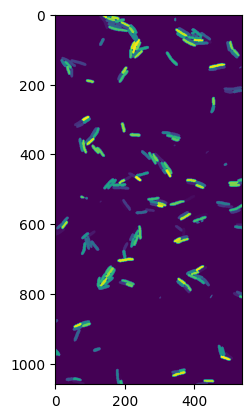

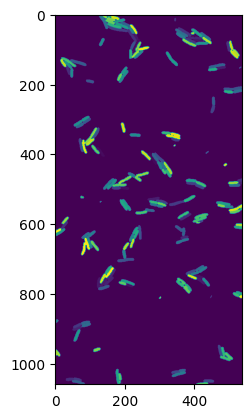

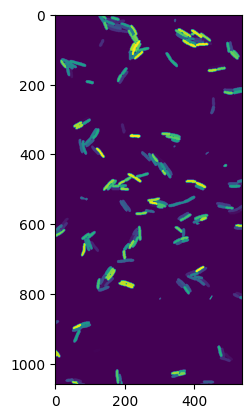

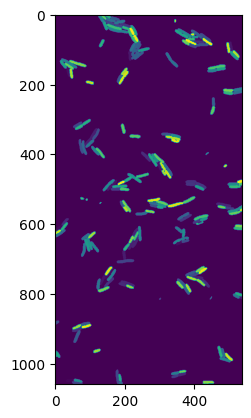

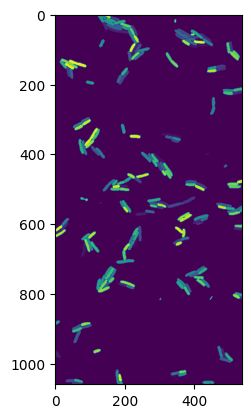

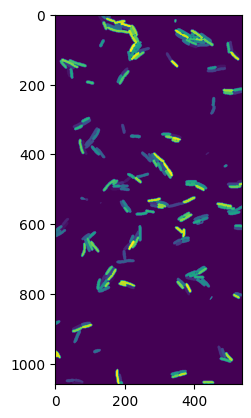

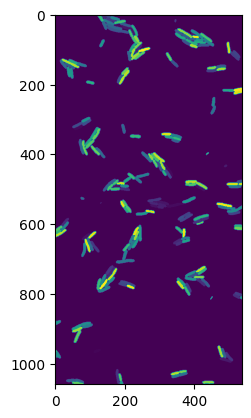

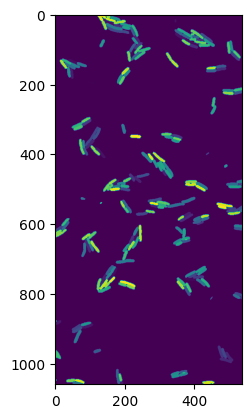

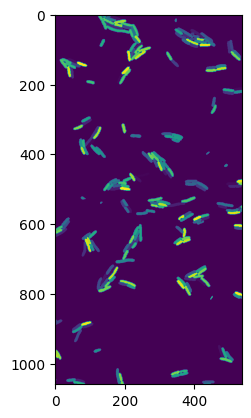

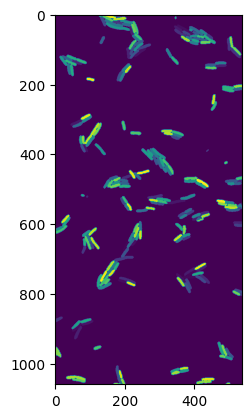

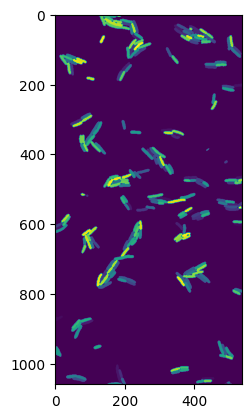

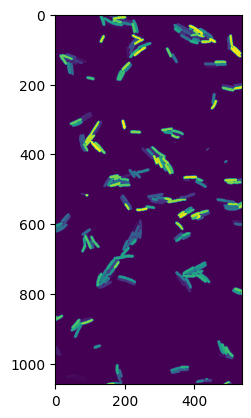

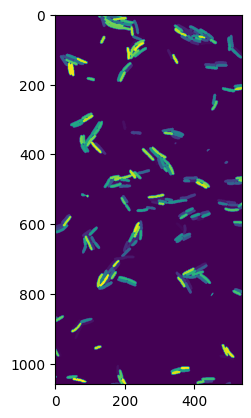

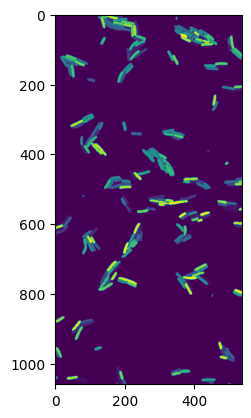

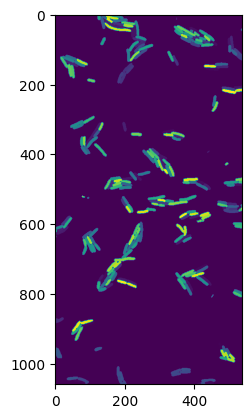

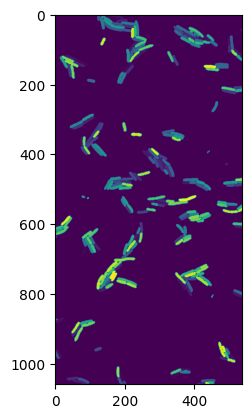

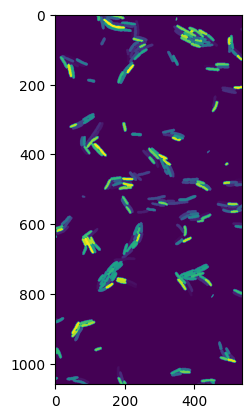

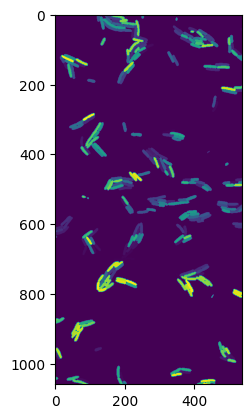

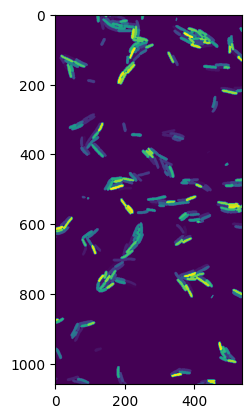

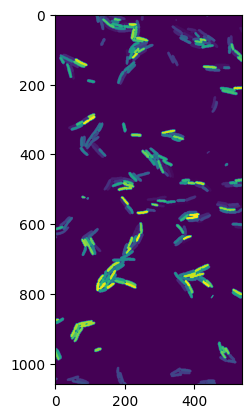

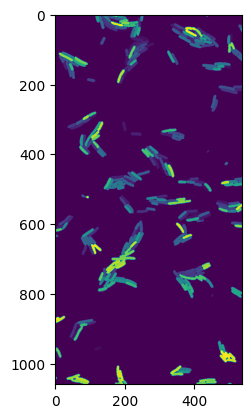

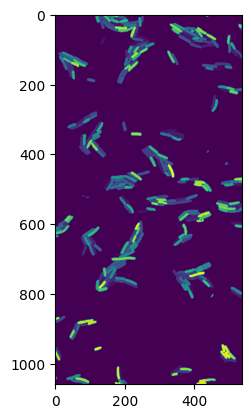

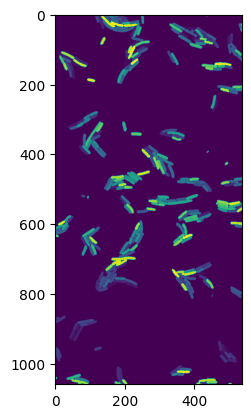

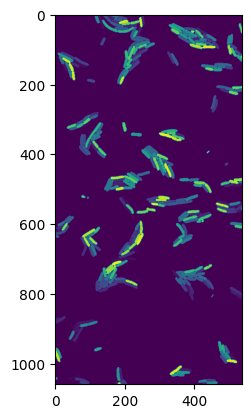

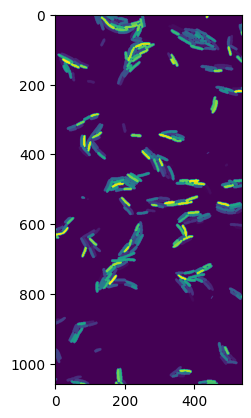

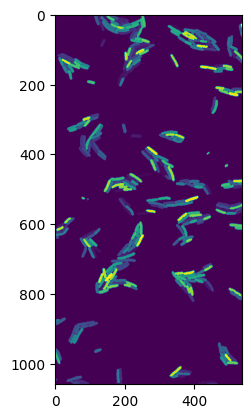

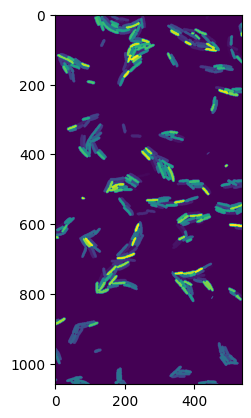

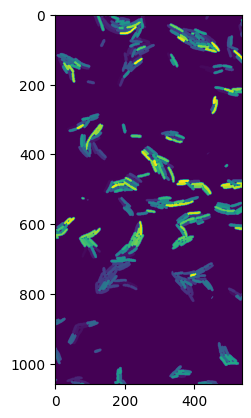

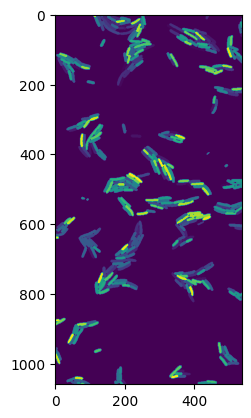

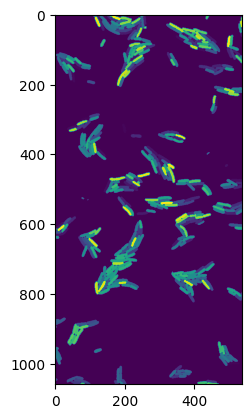

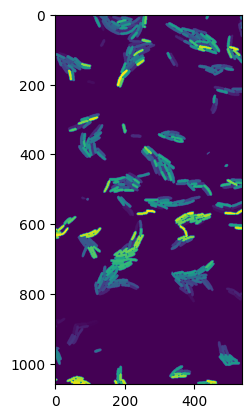

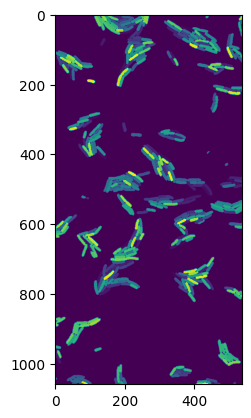

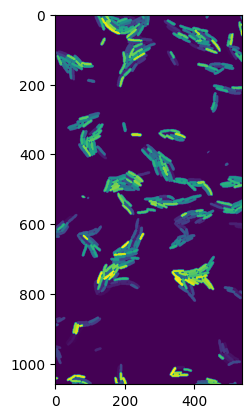

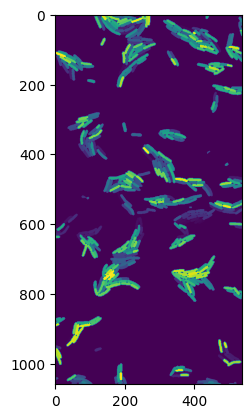

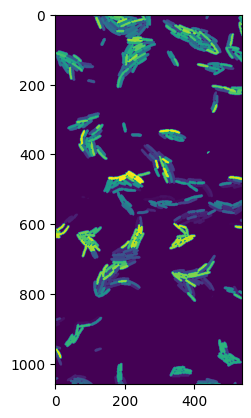

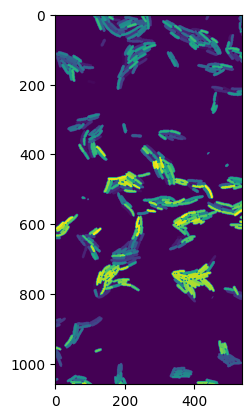

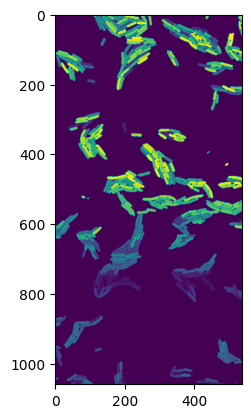

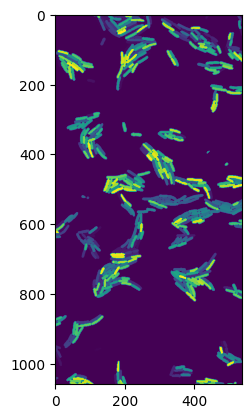

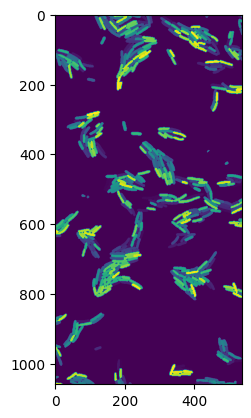

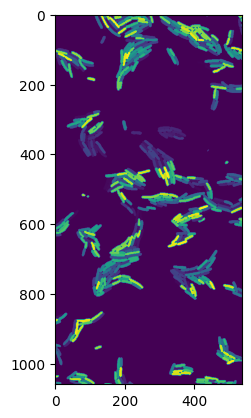

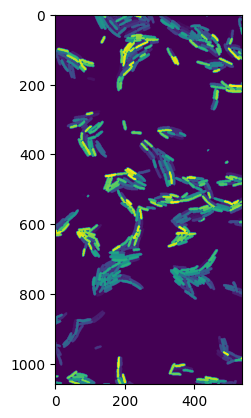

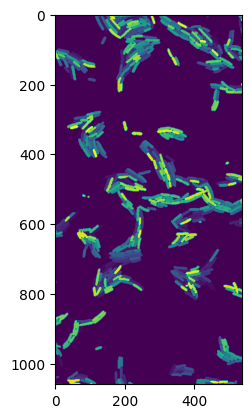

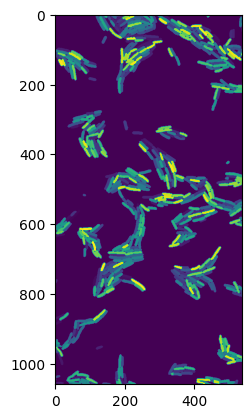

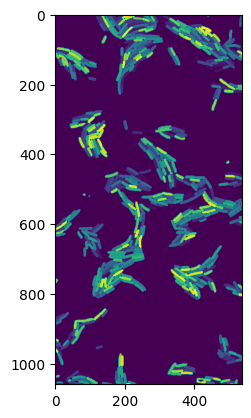

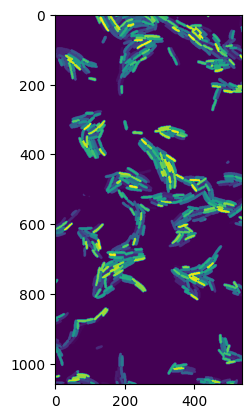

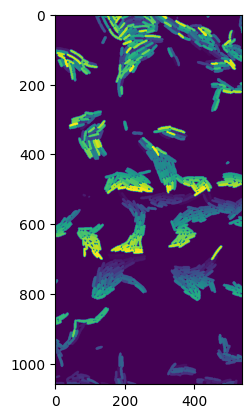

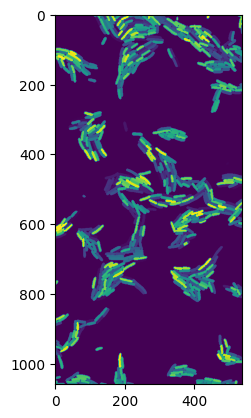

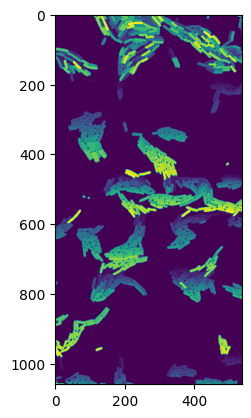

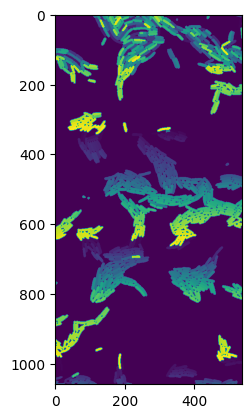

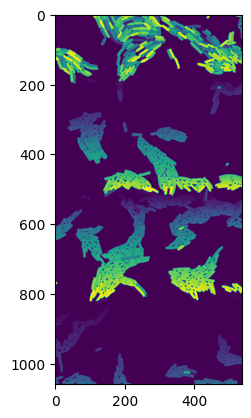

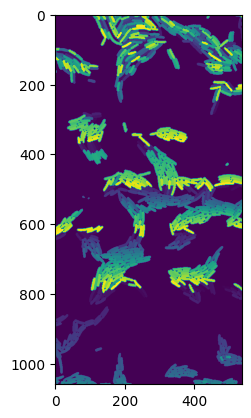

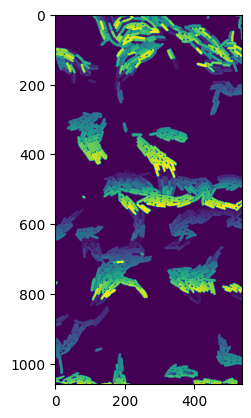

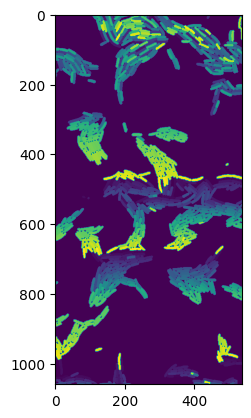

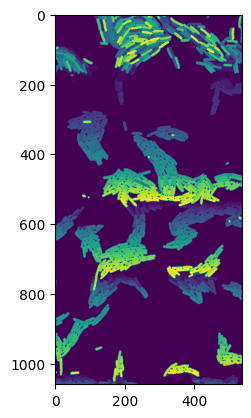

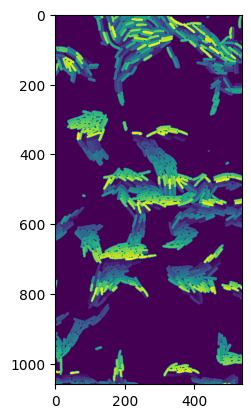

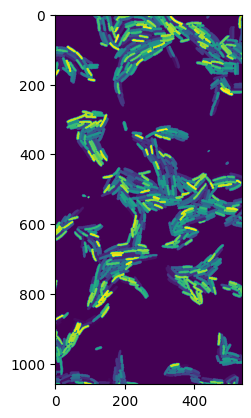

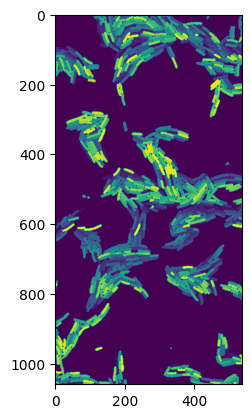

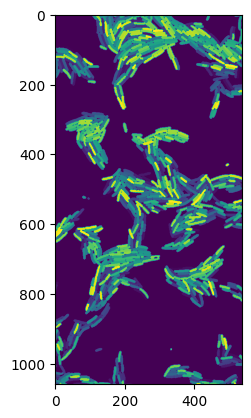

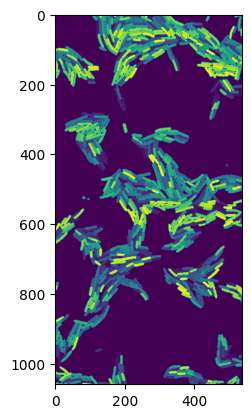

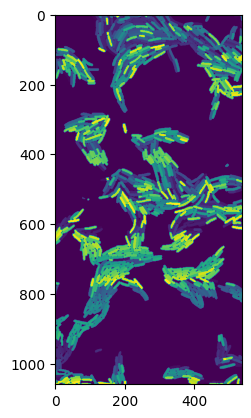

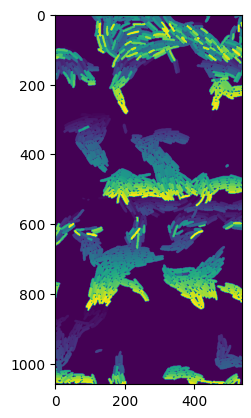

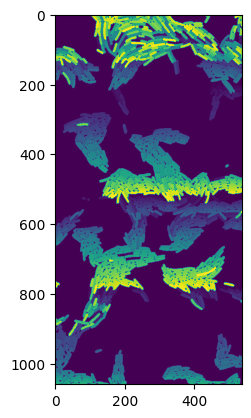

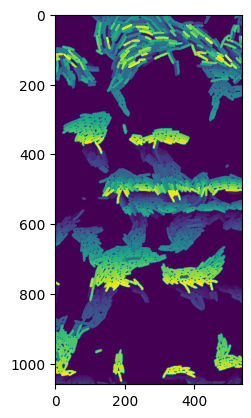

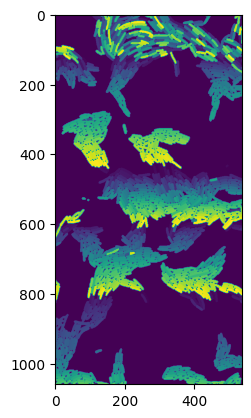

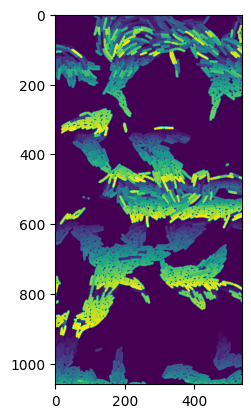

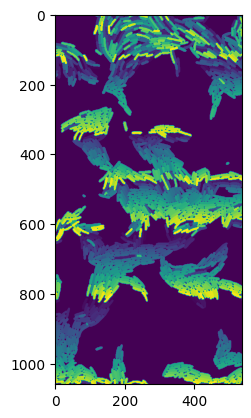

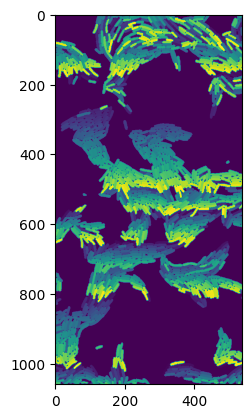

In [49]:
import matplotlib.pyplot as plt
import ncolor 
import numpy as np

for mask in mask_arr:
    #print(np.max(mask))
    mask_image = Image.fromarray(mask.astype(np.uint8), 'L')
    #print(np.max(mask_image))
    plt.imshow(mask_image)
    plt.show()

    #break

In [11]:
from tracking import solve
nodes, edges, weights = solve(hier_arr, seg_num = total_num, cost_func_name = "overlap")

2024-01-08 03:18:32,274 [INFO] Start building up problem


/Users/sherryyang/anaconda3/envs/omnipose-track/lib/python3.10/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


2024-01-08 03:18:32,966 [INFO] 4303
2024-01-08 03:18:32,967 [INFO] Start solving problem
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-07
2024-01-08 03:18:33,151 [INFO] MIP problem be set up, start solving
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.0.0 23A344)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4516 rows, 10147 columns and 19054 nonzeros
Model fingerprint: 0x5834399f
Variable types: 0 continuous, 10147 integer (10147 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -4.5000000
Presolve removed 375 rows and 1846 columns


In [12]:
import numpy as np

n = np.asarray([i for i, node in enumerate(nodes) if node.x > 0.5], dtype=int)
e = np.asarray([i for i, edge in enumerate(edges) if edge.x > 0.5], dtype=int)

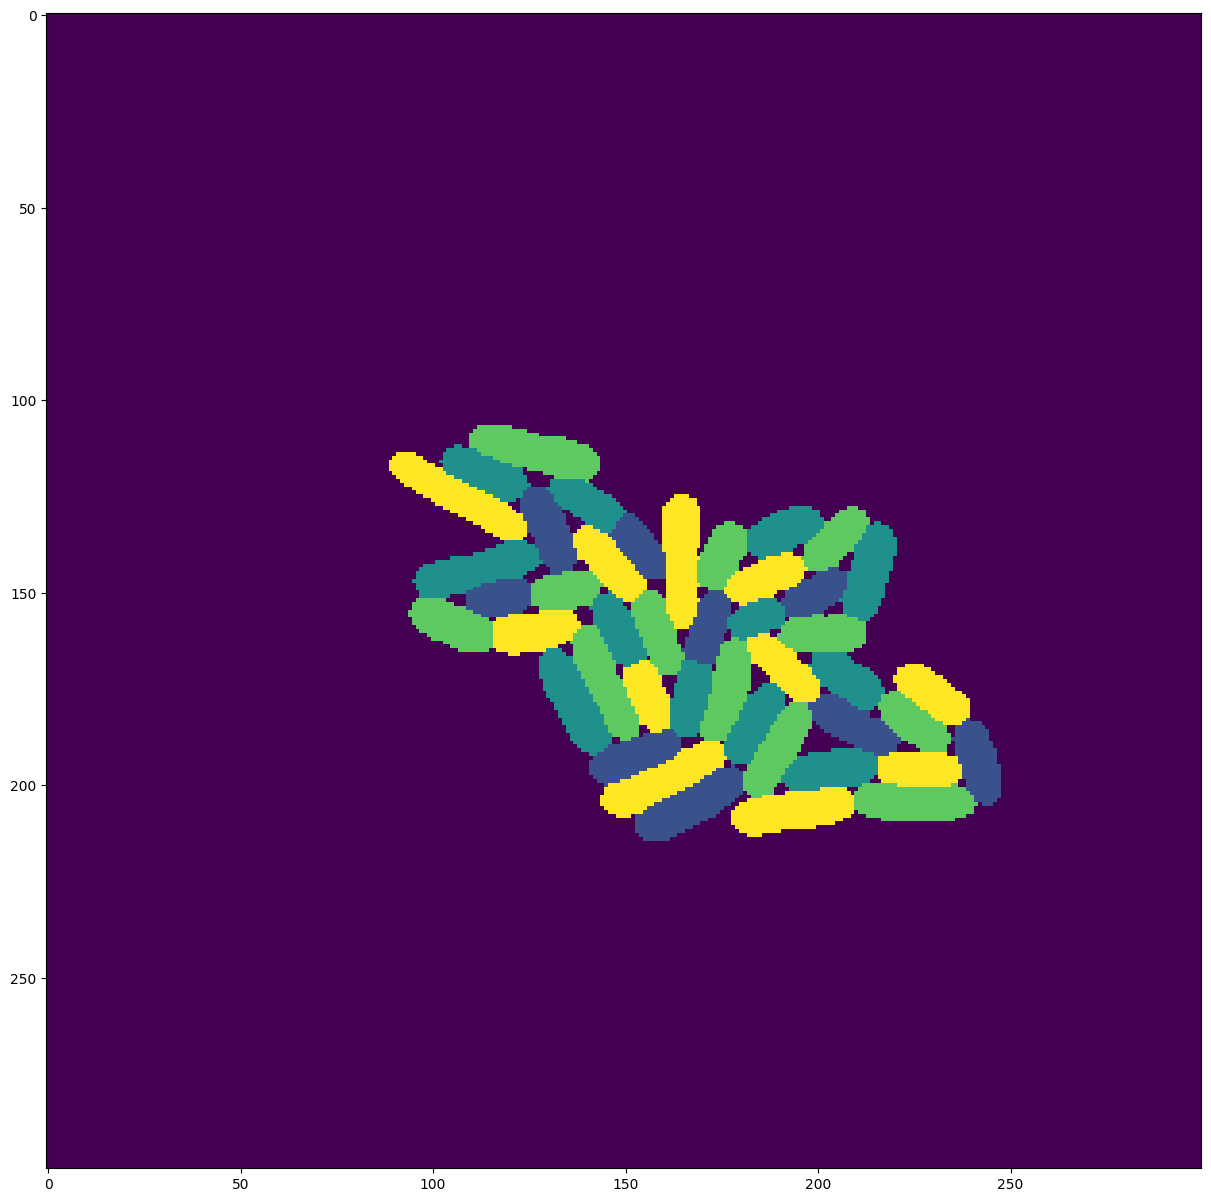

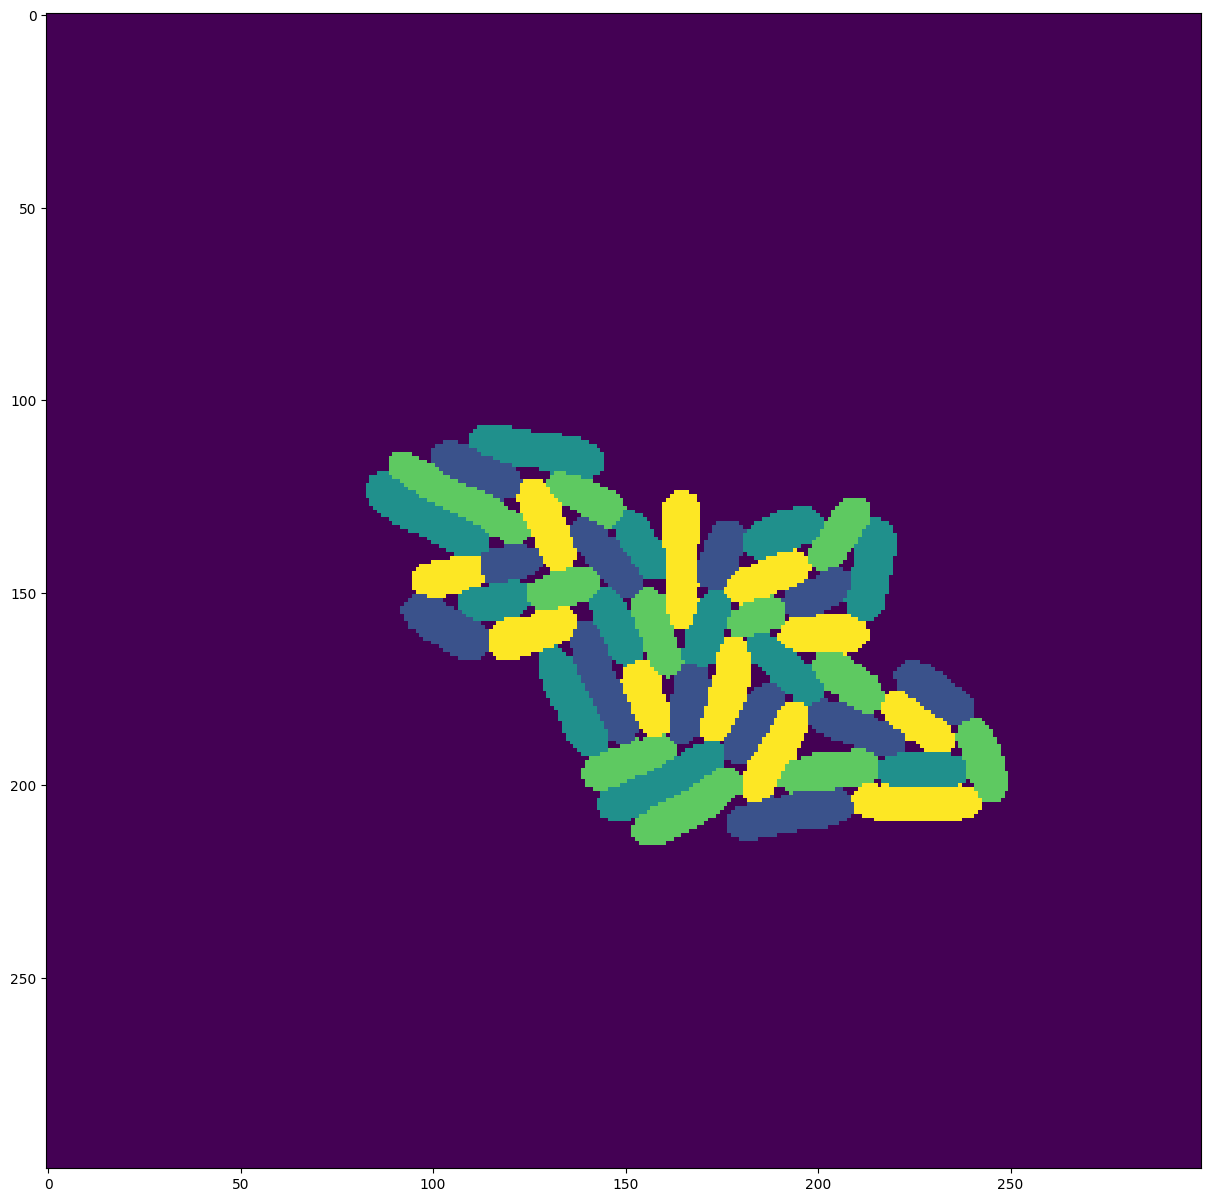

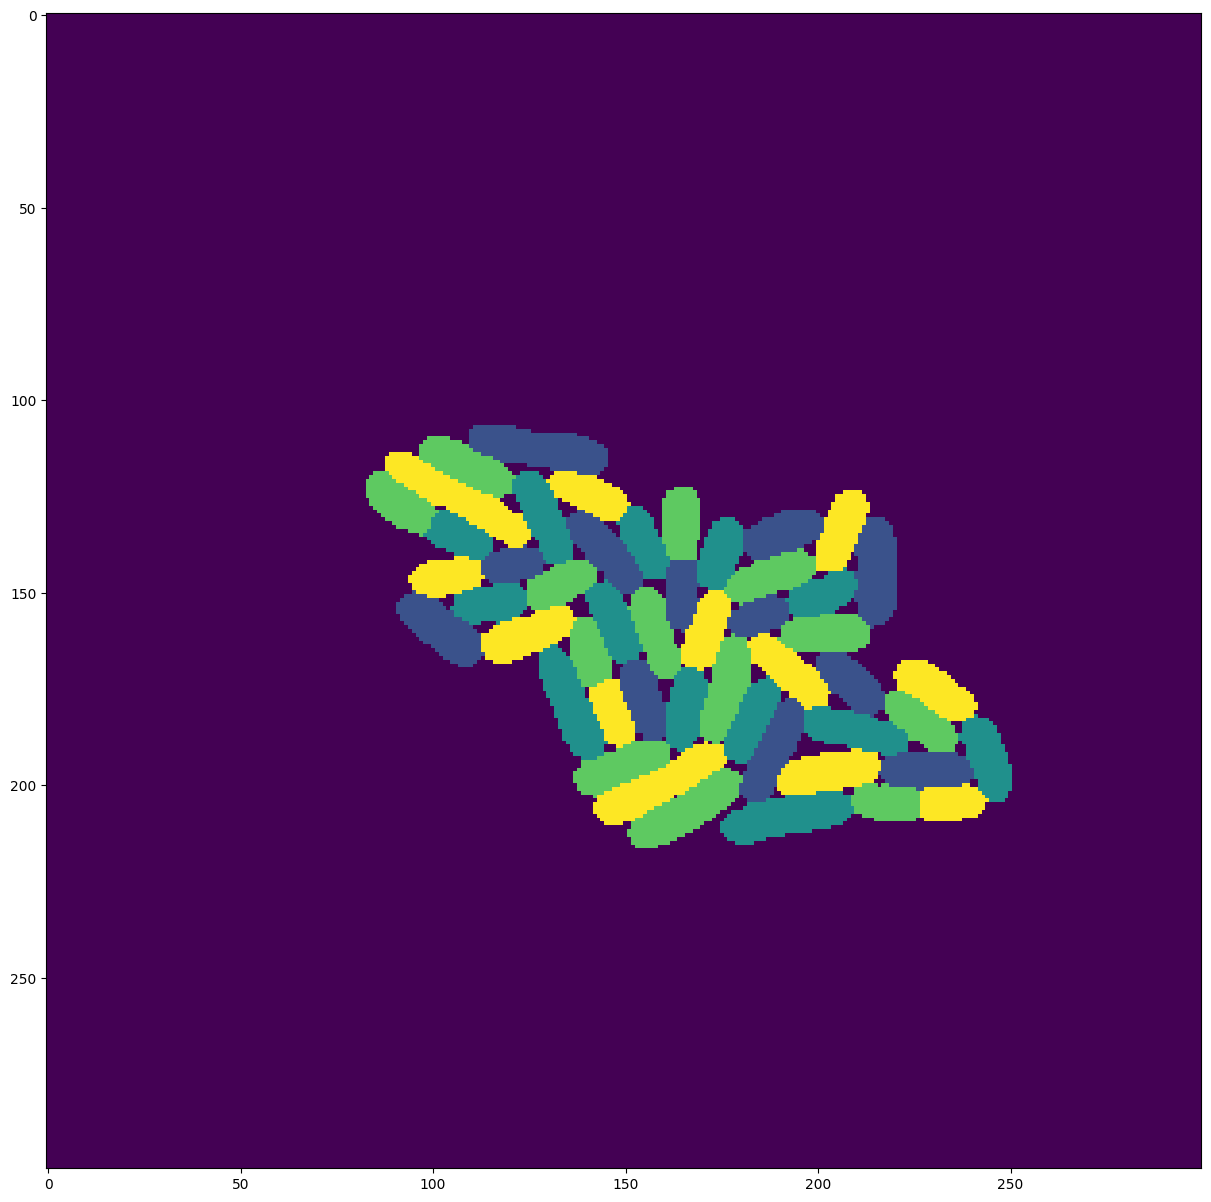

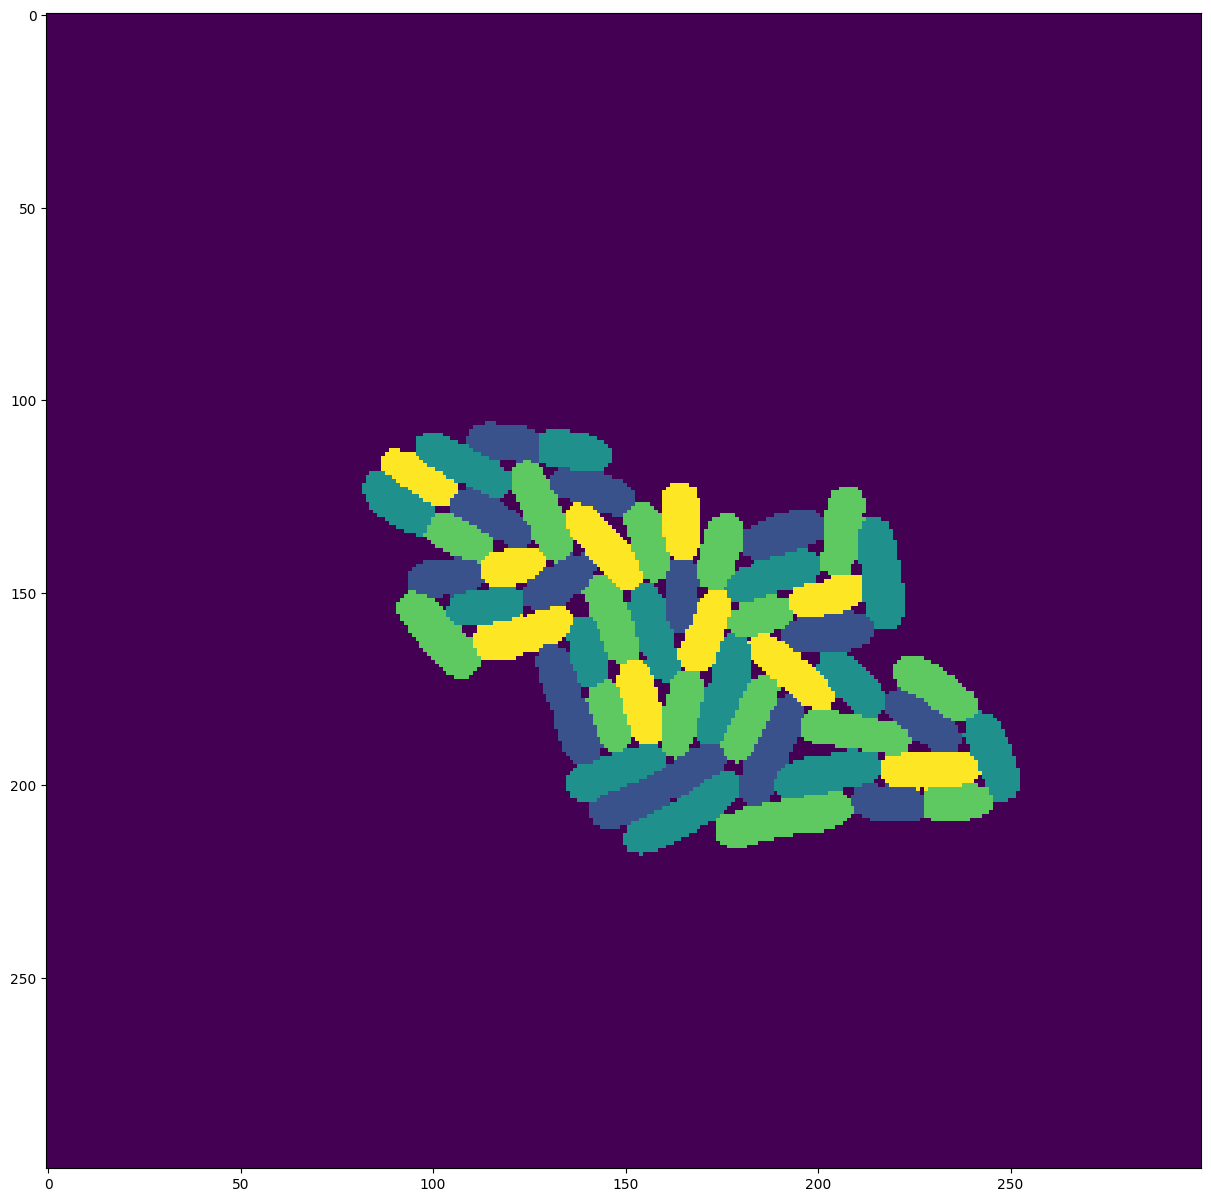

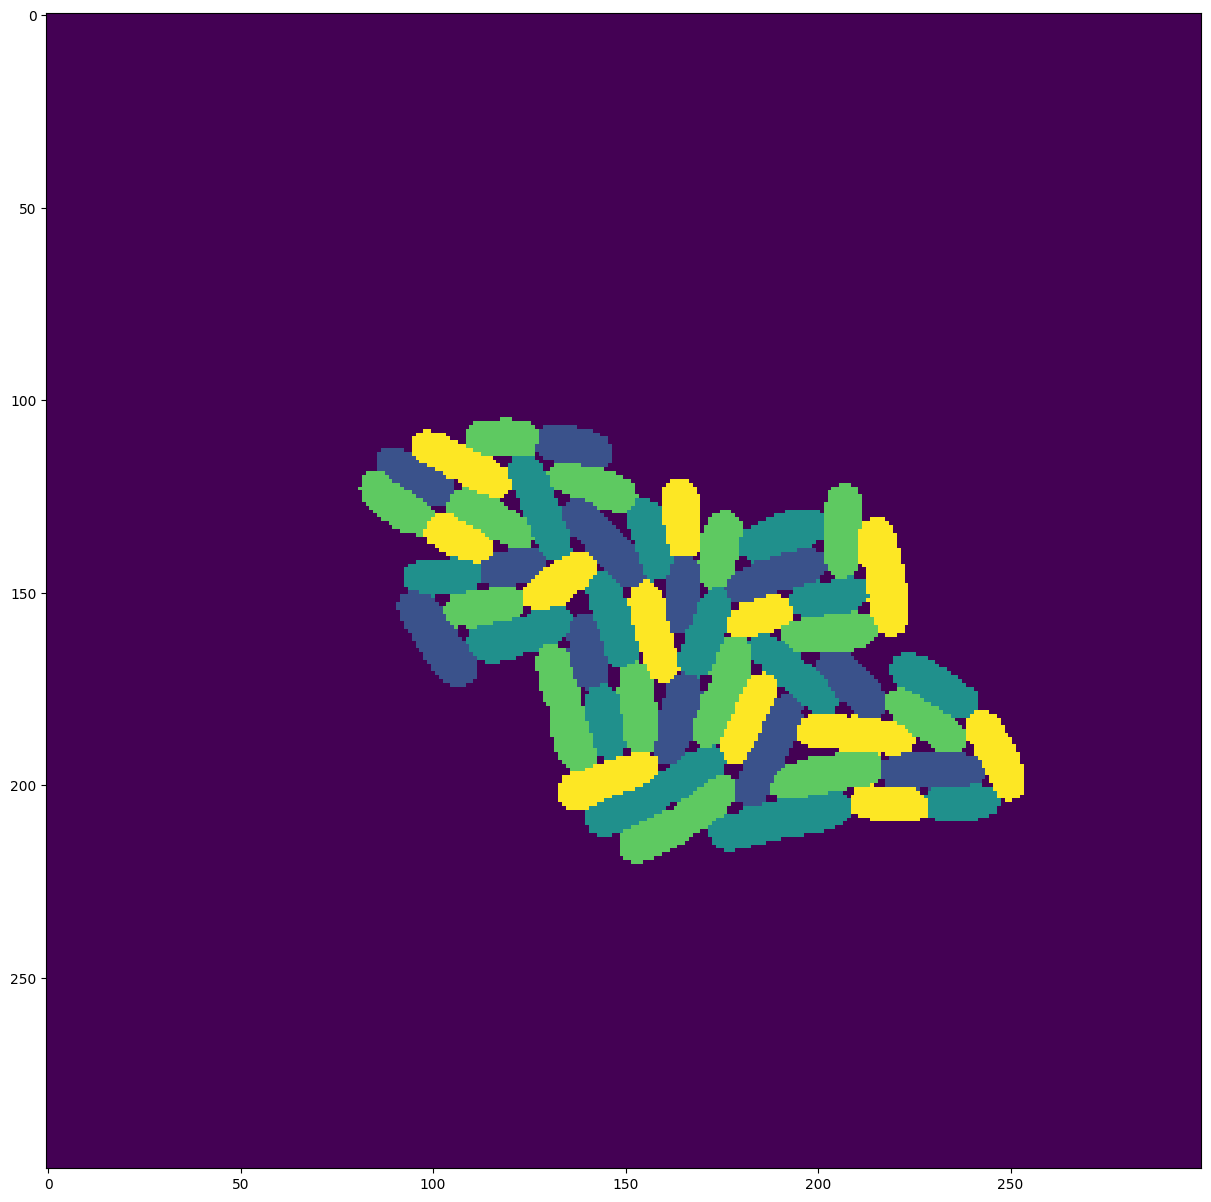

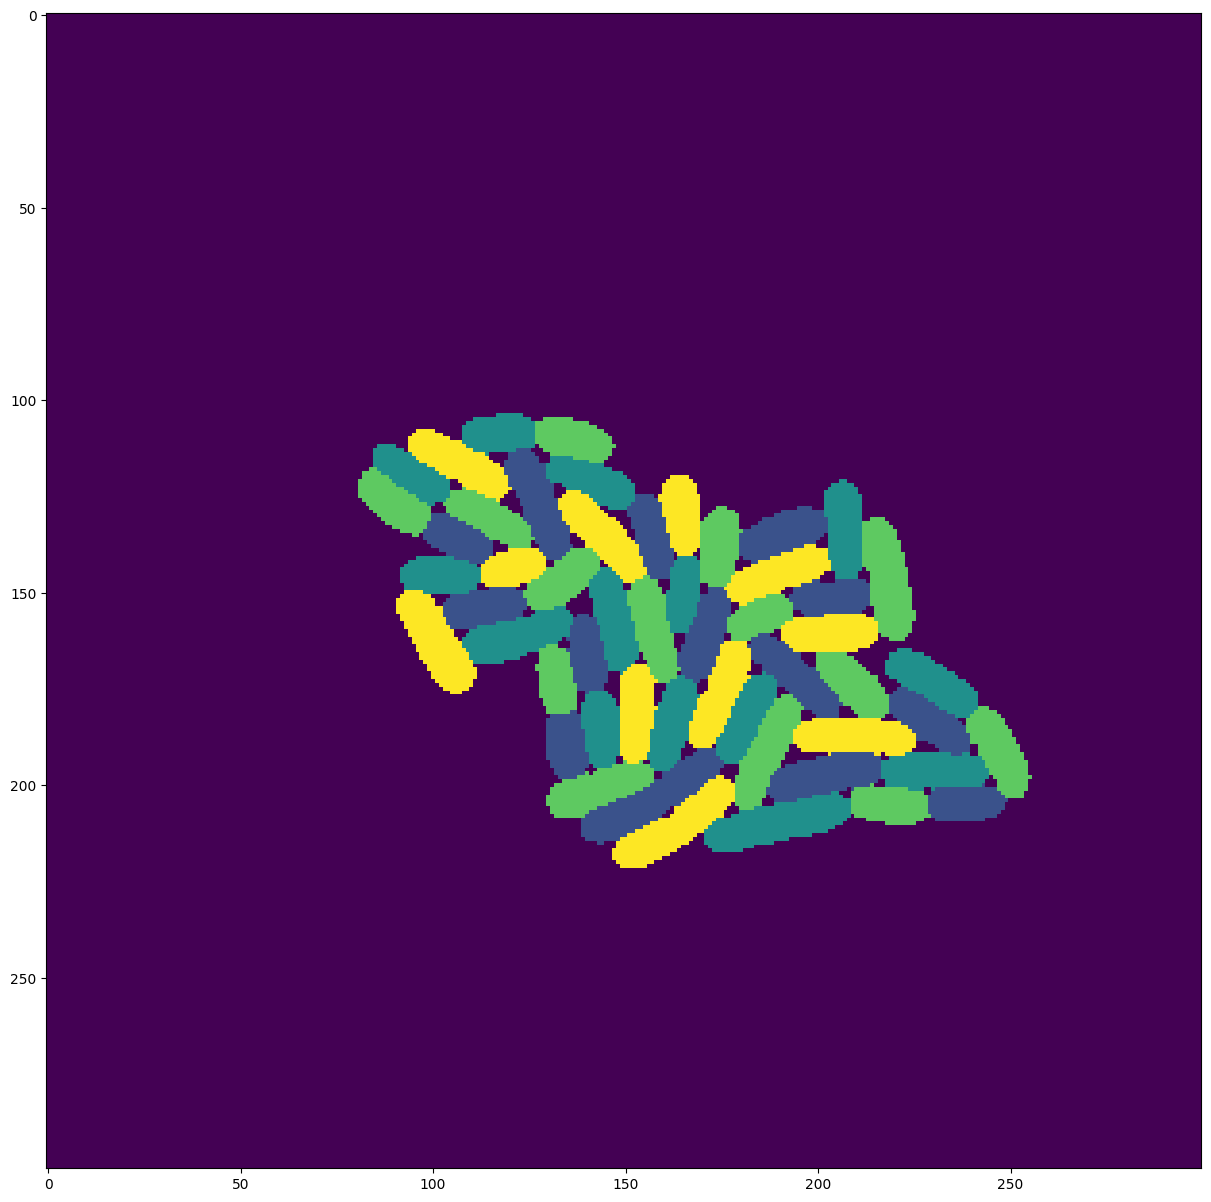

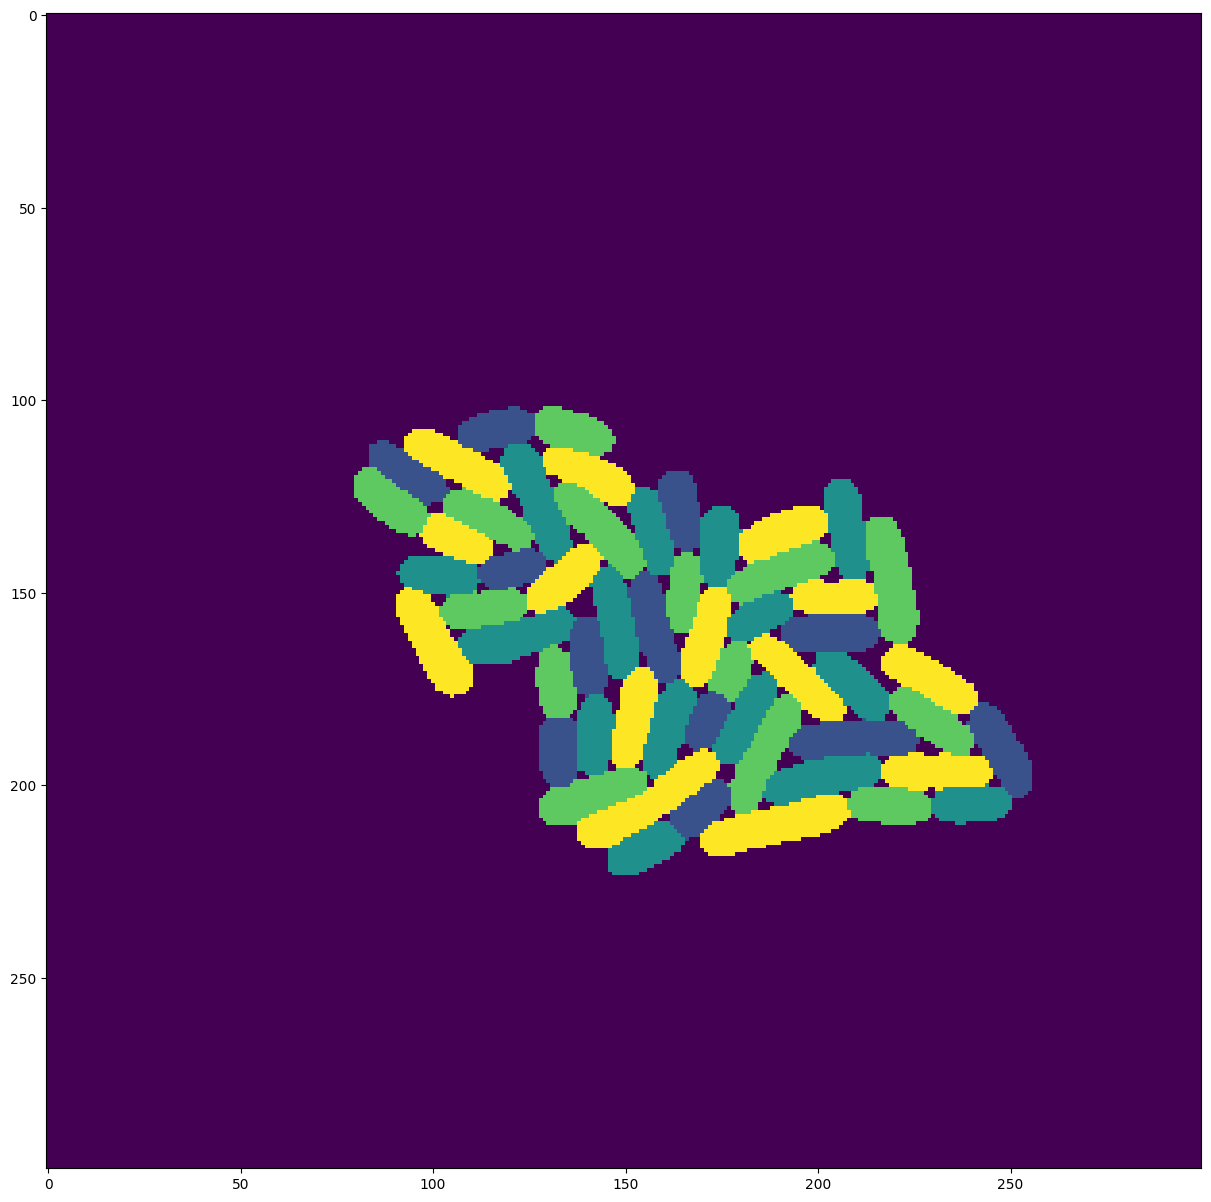

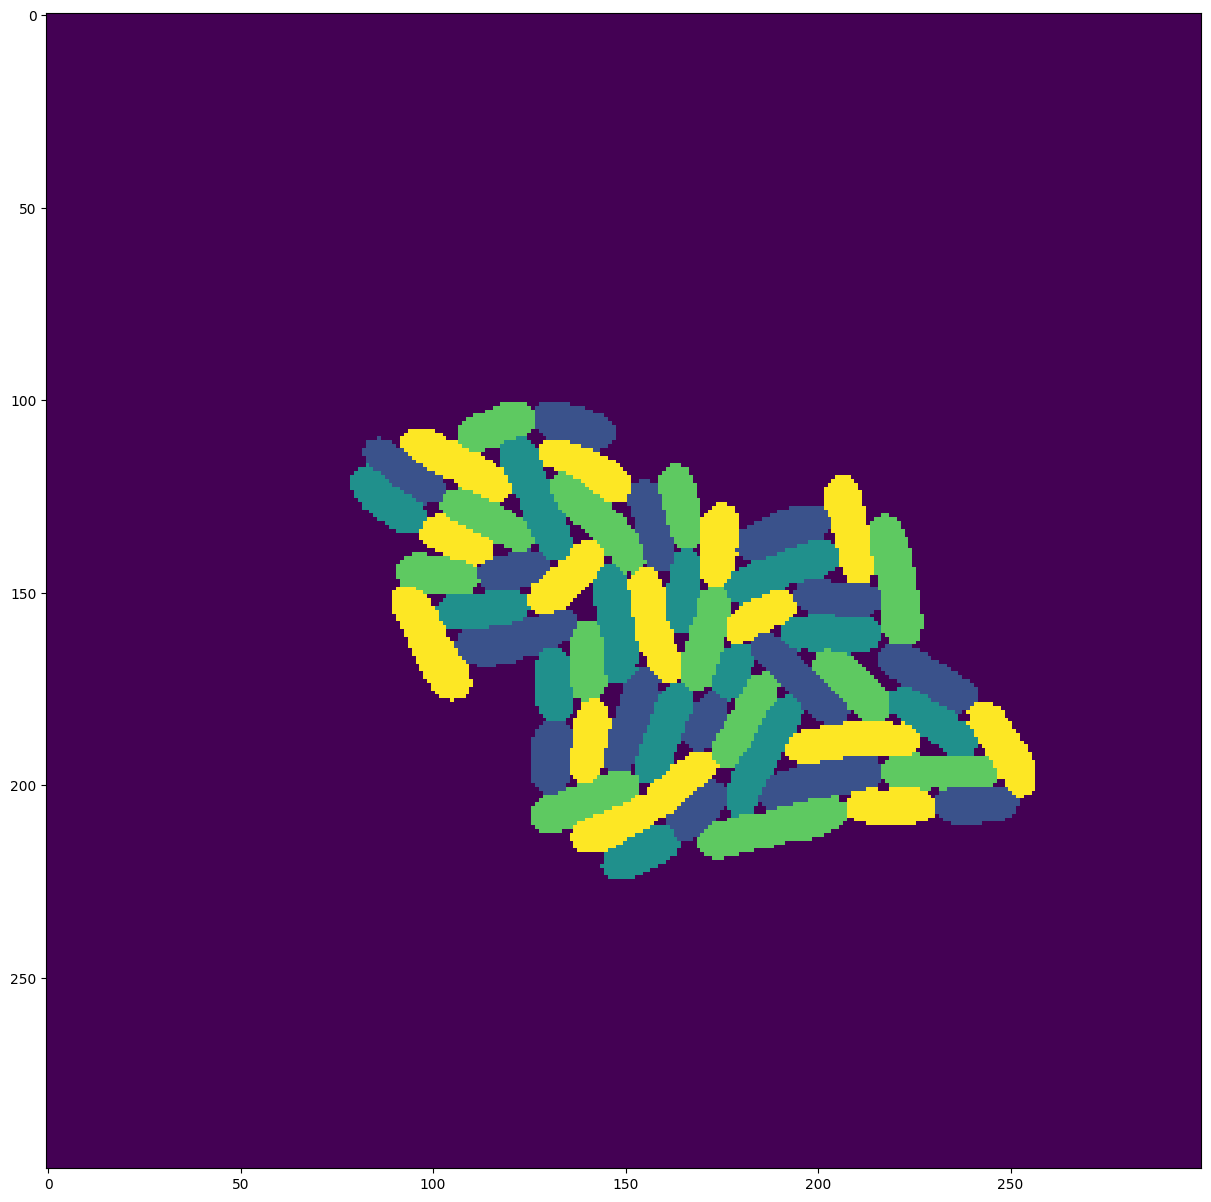

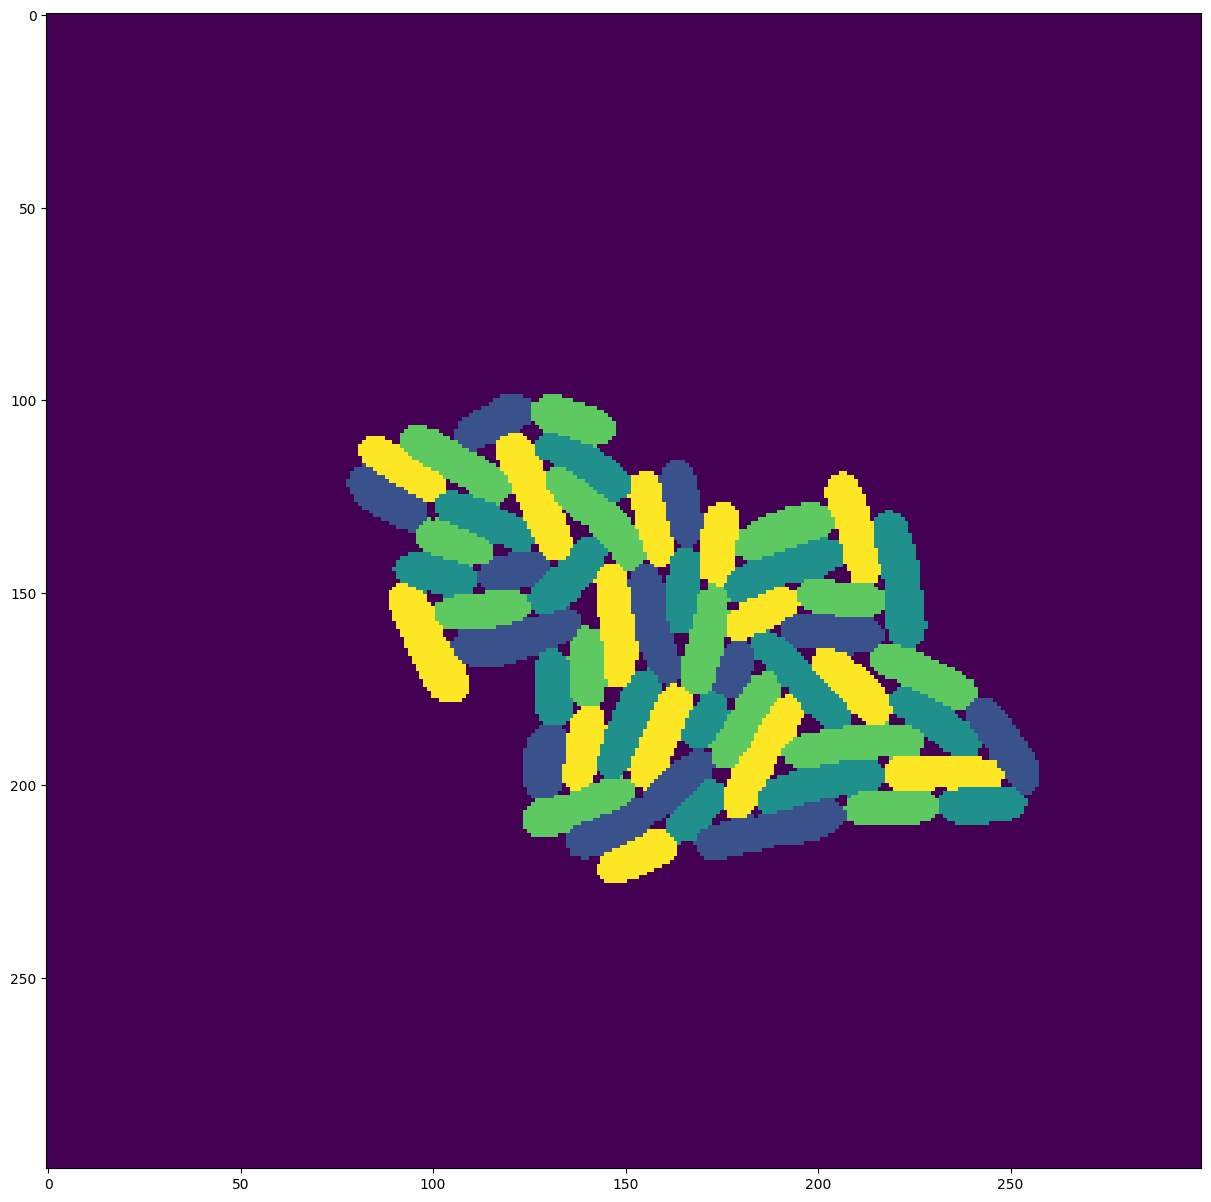

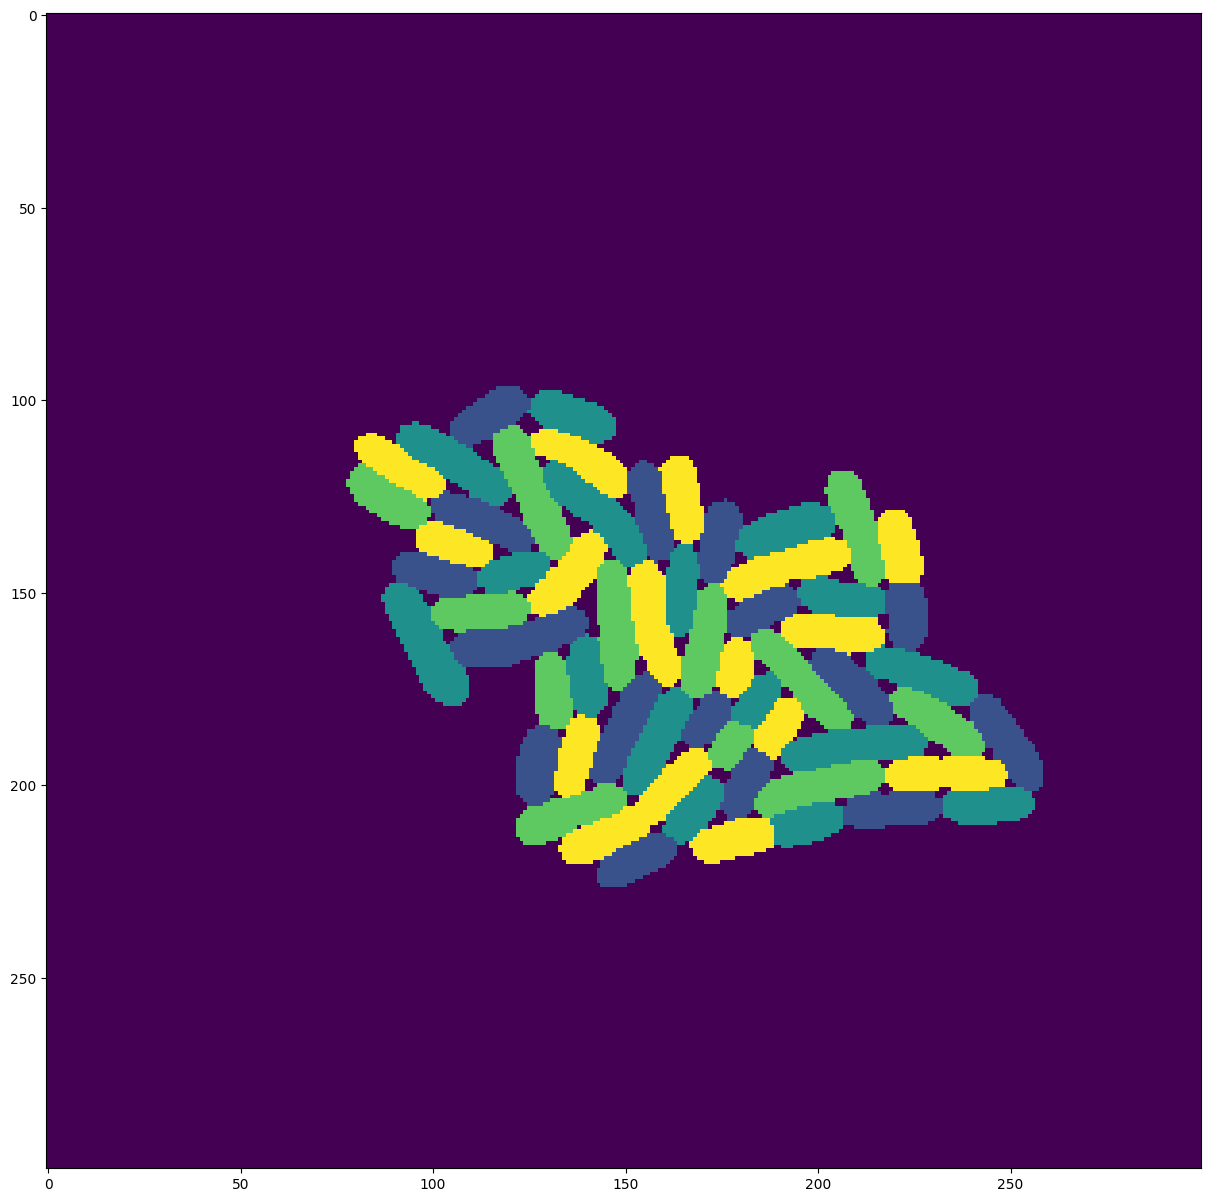

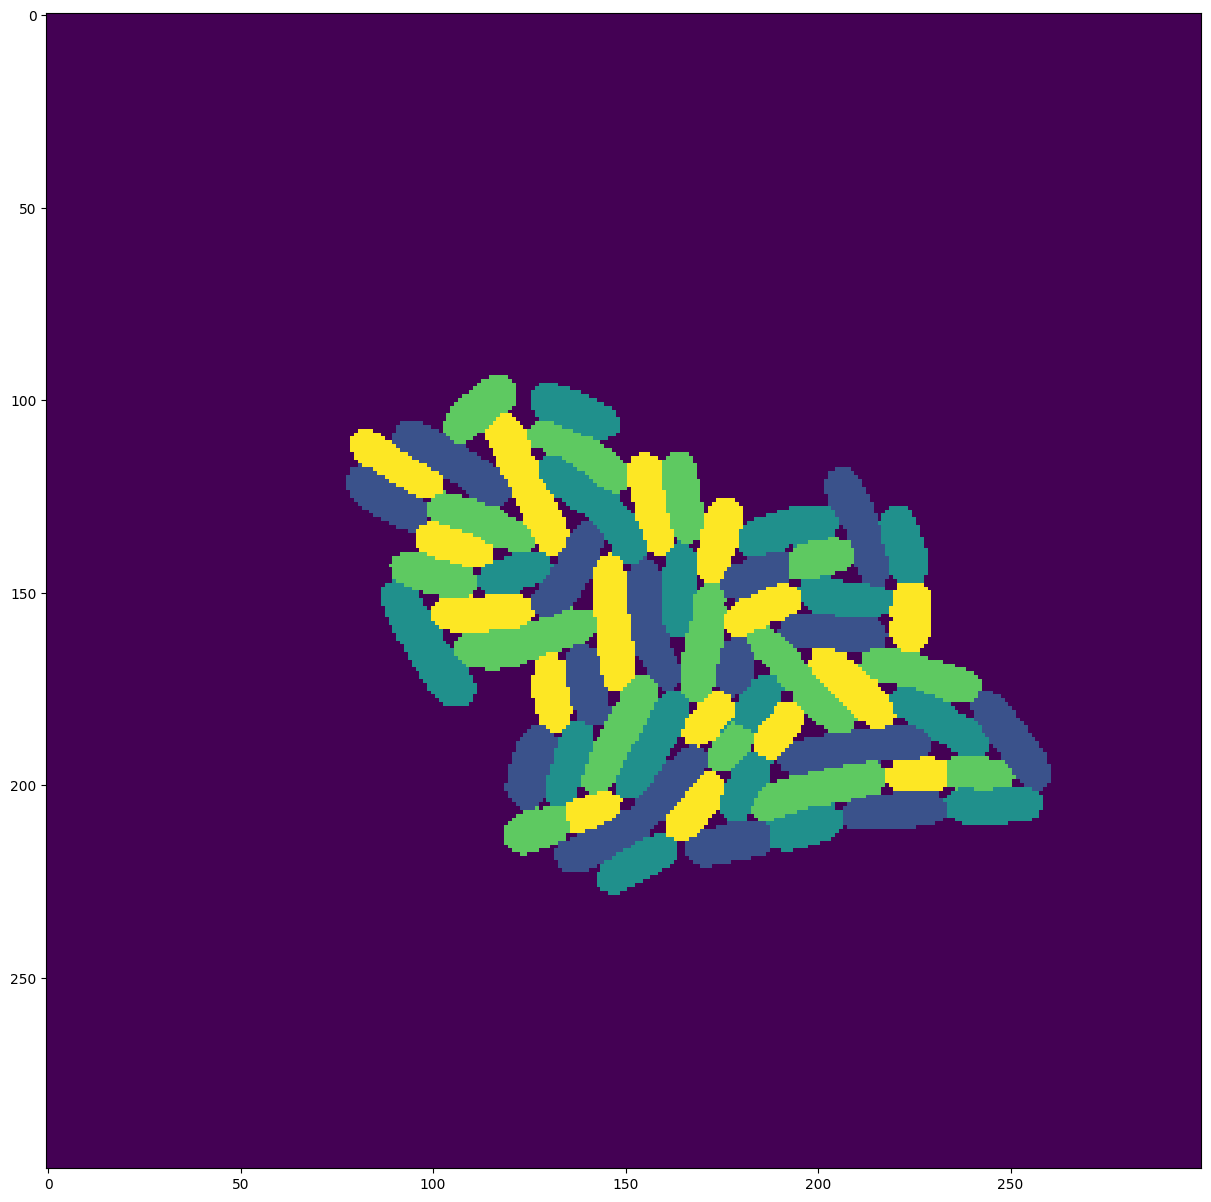

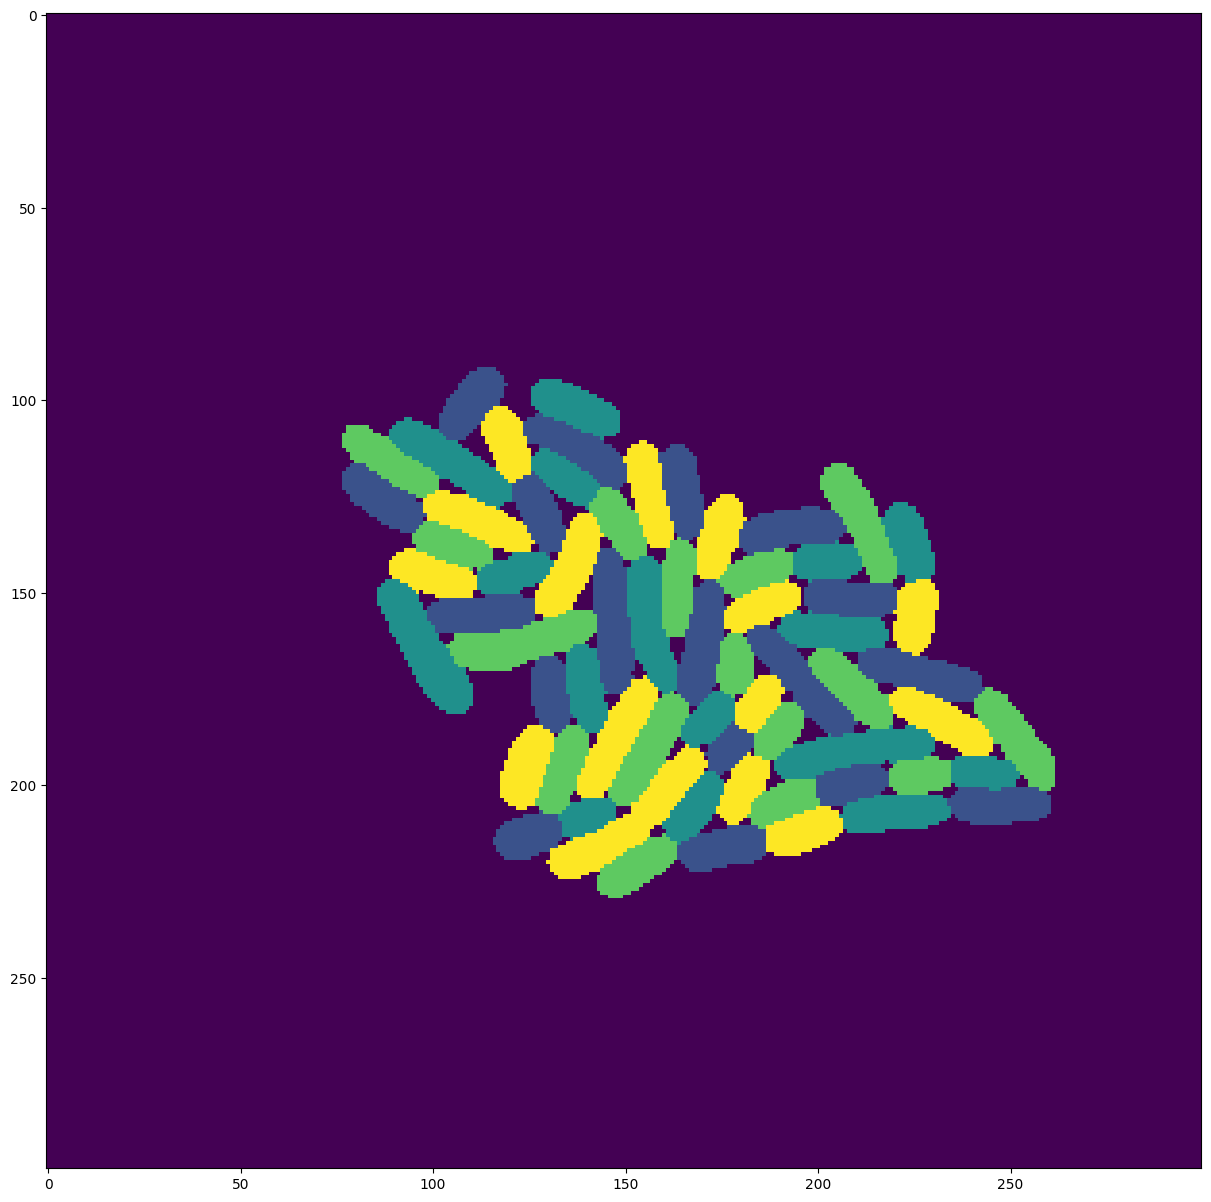

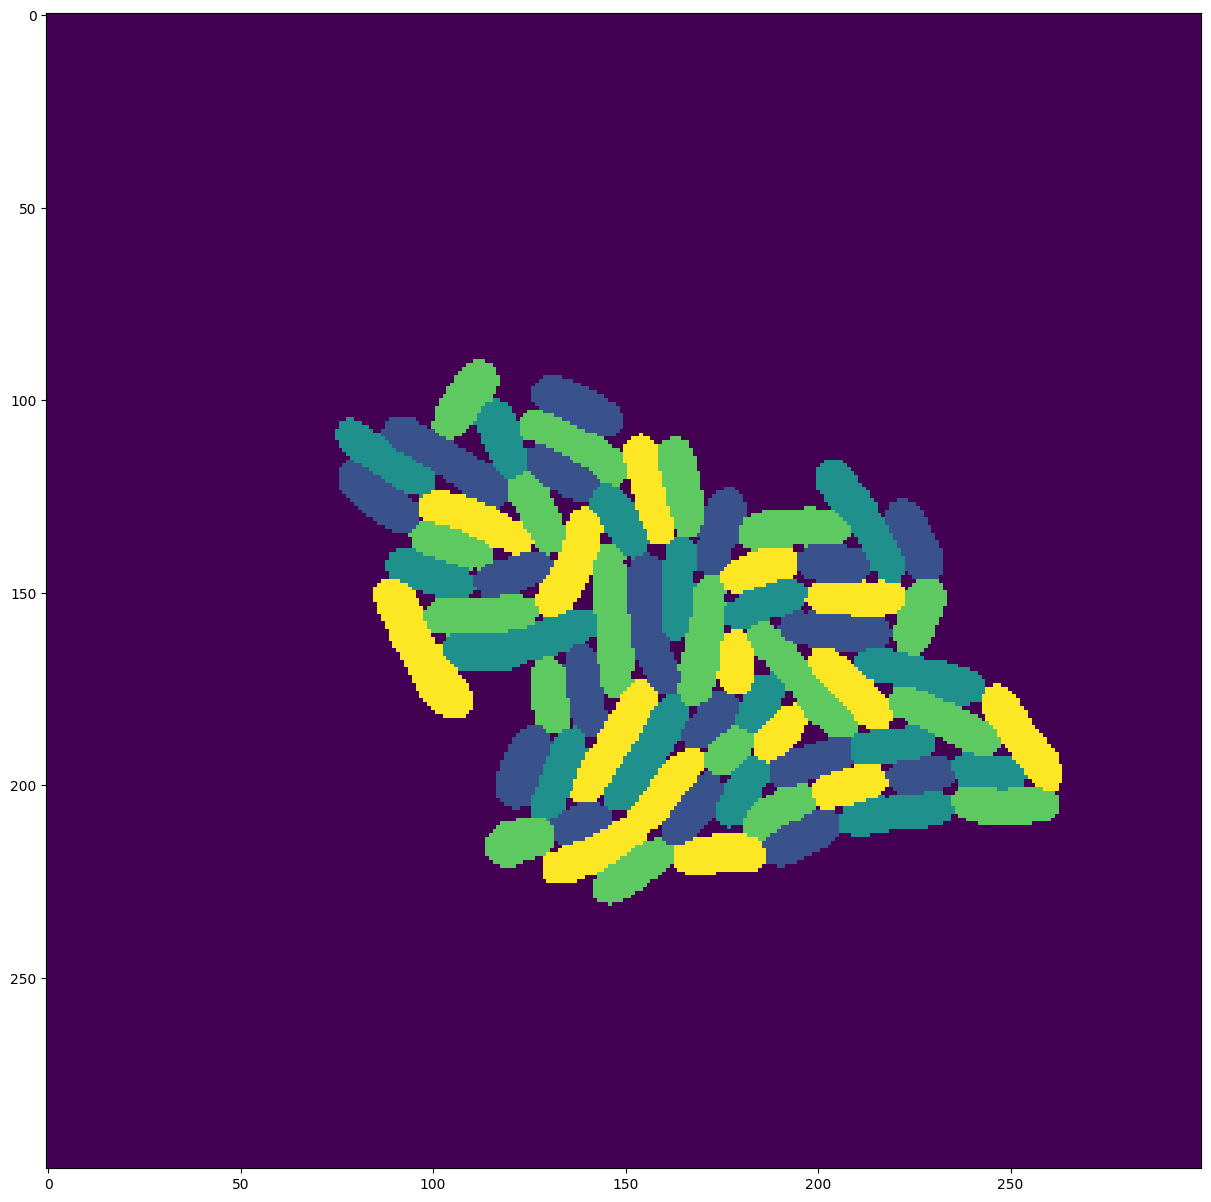

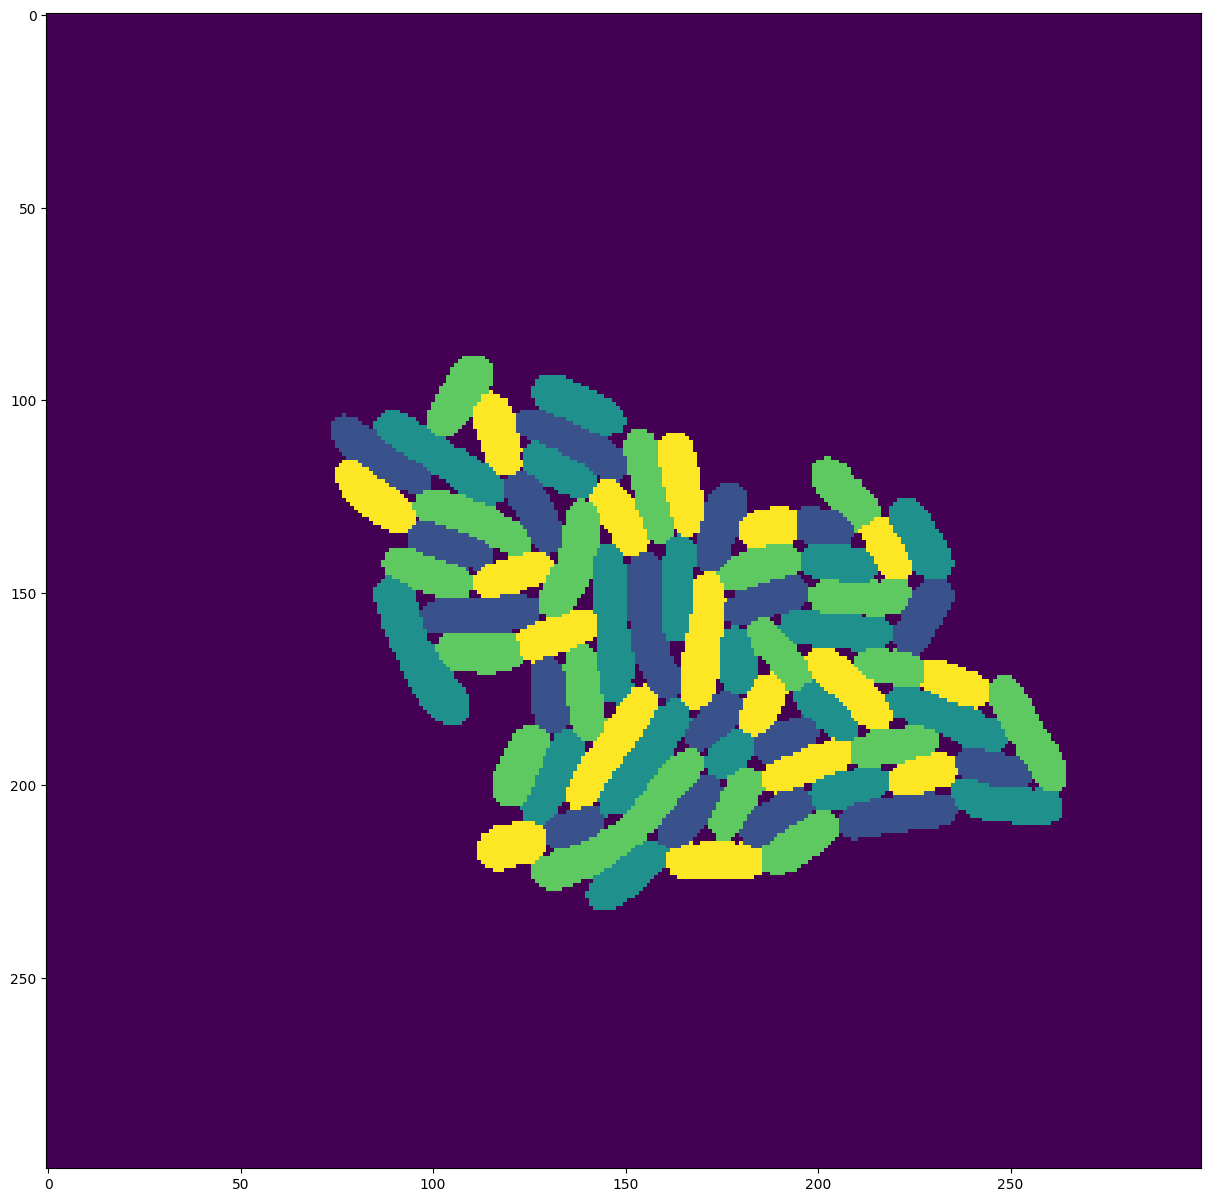

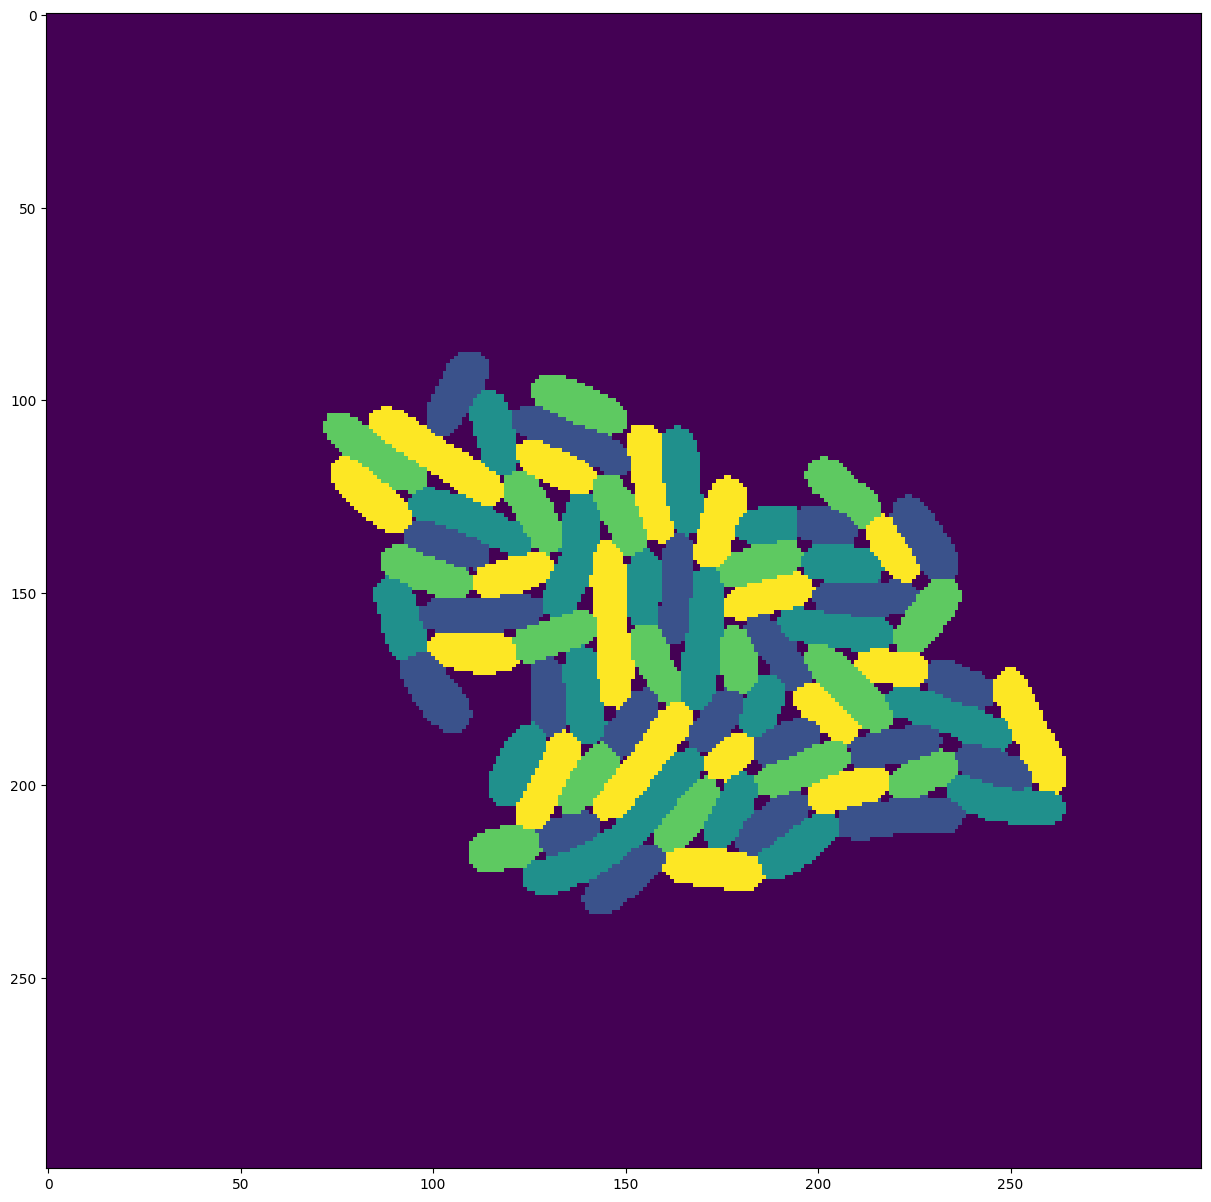

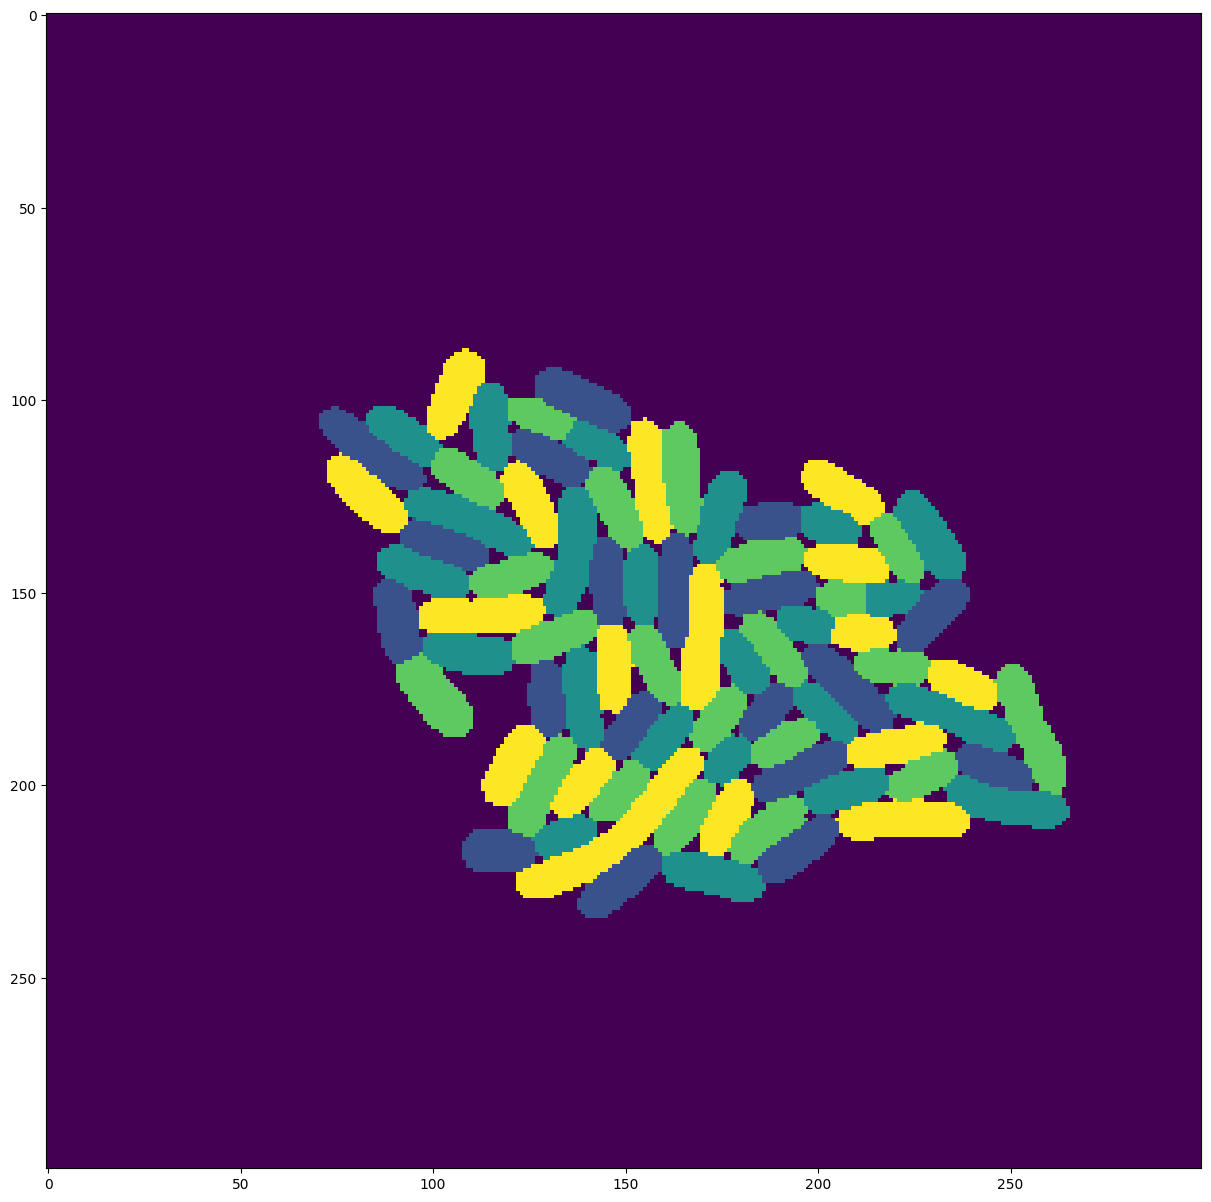

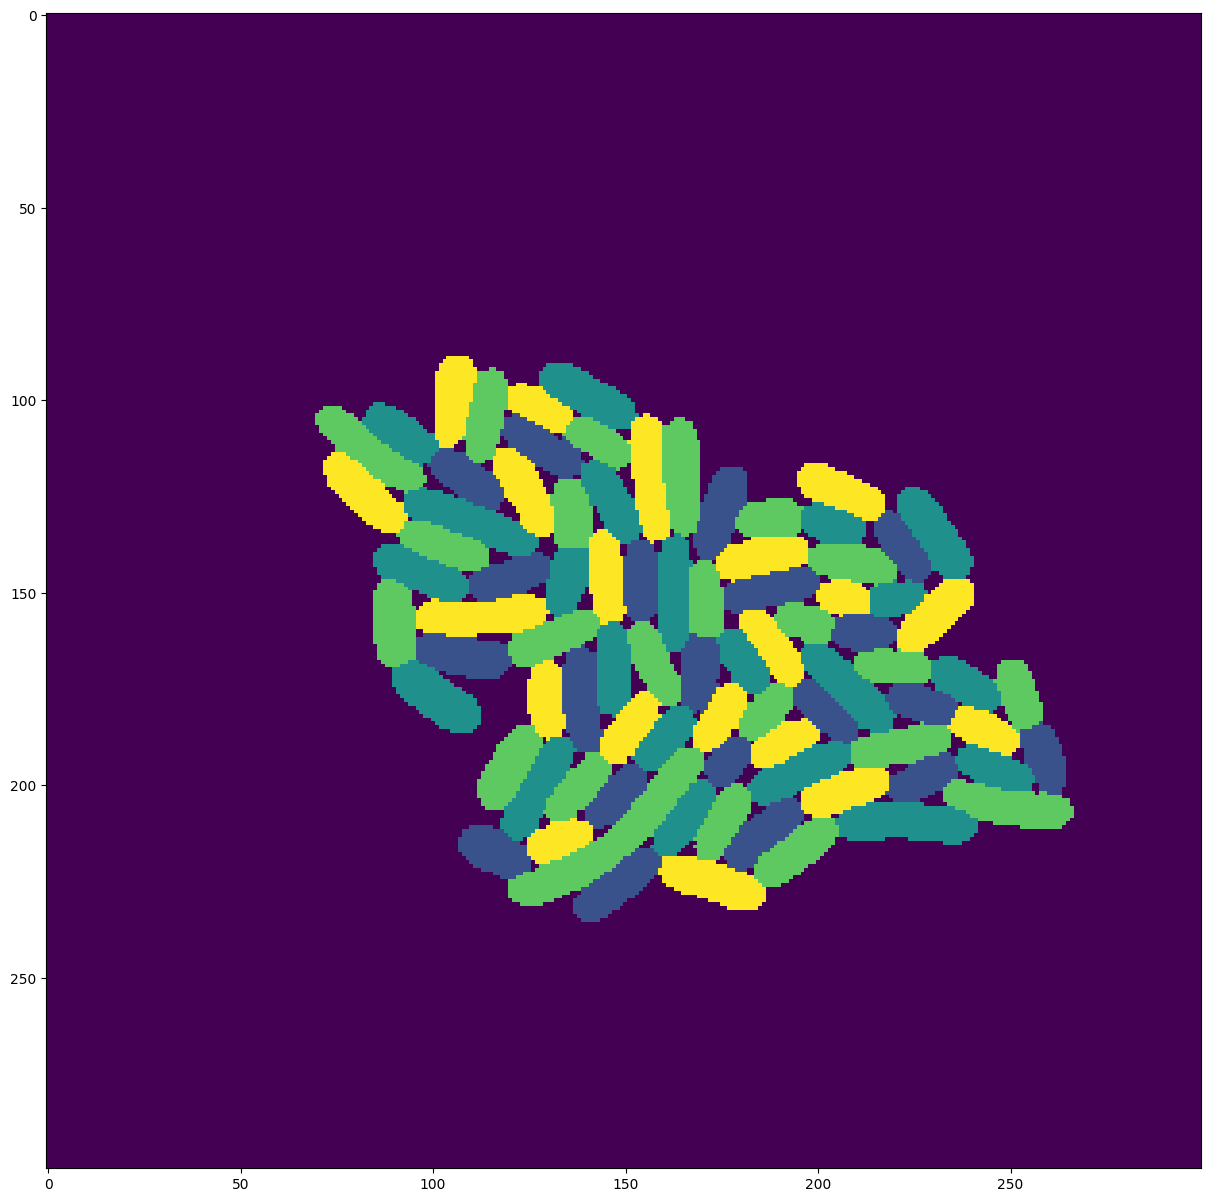

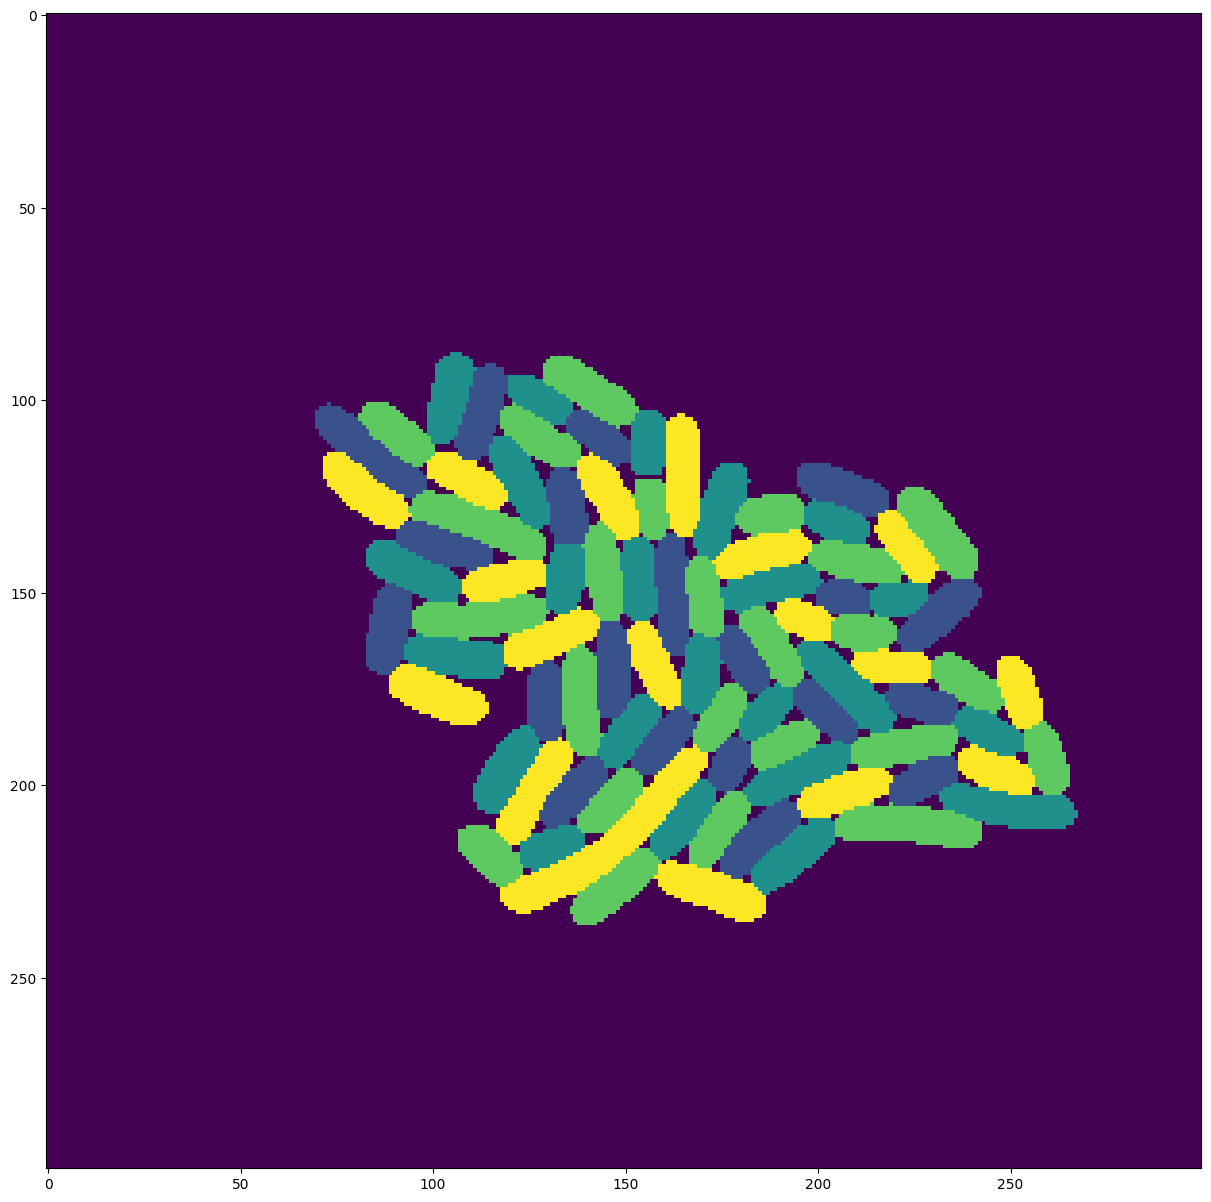

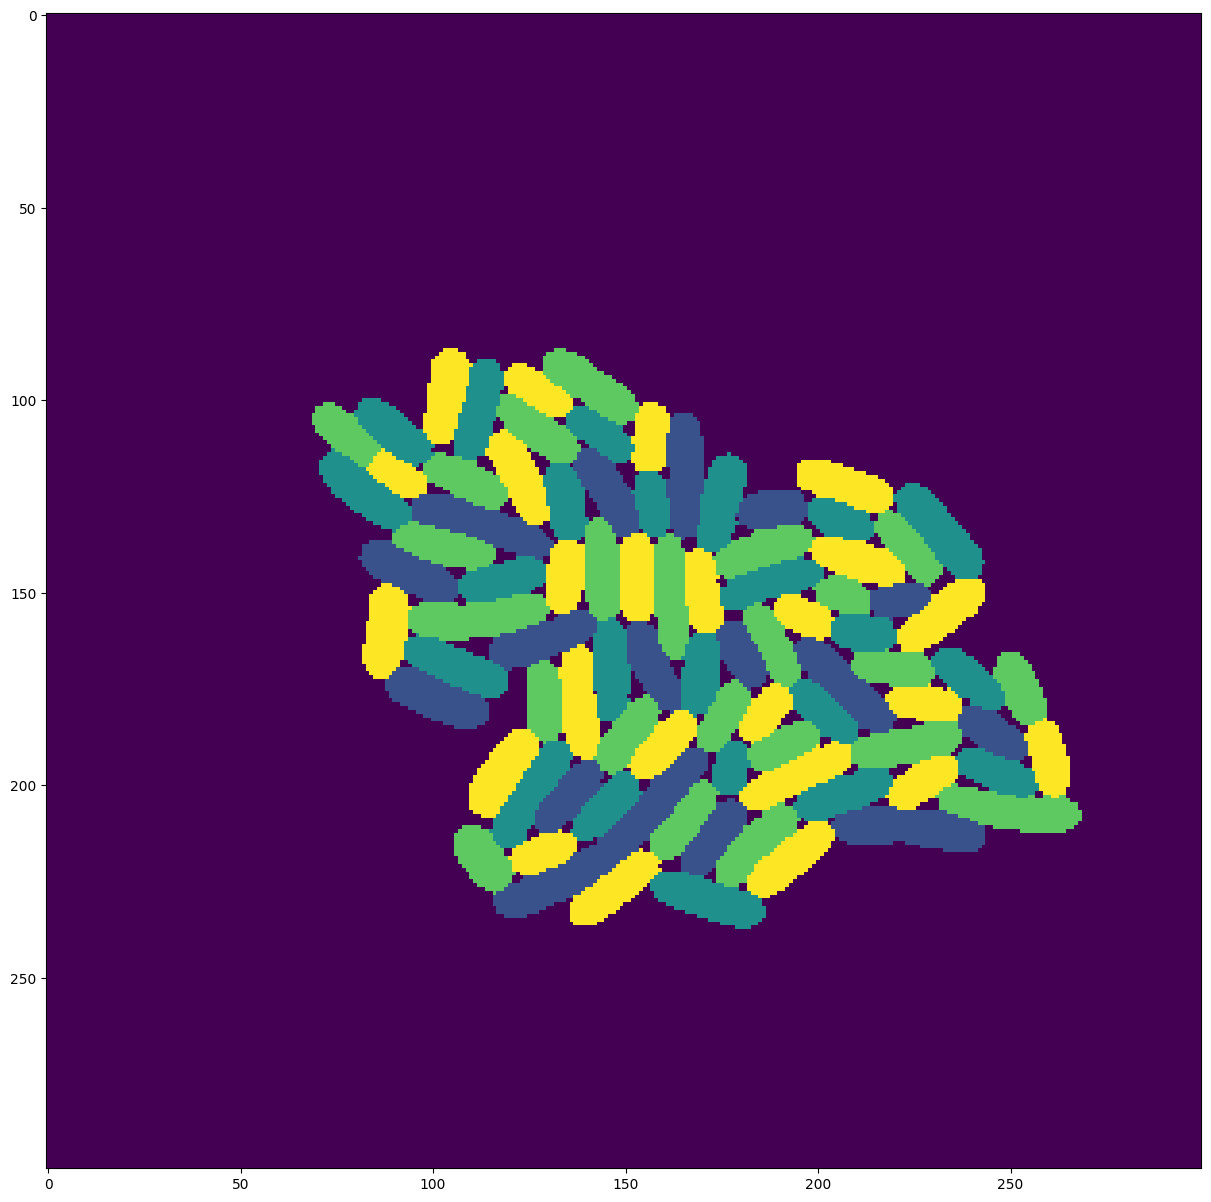

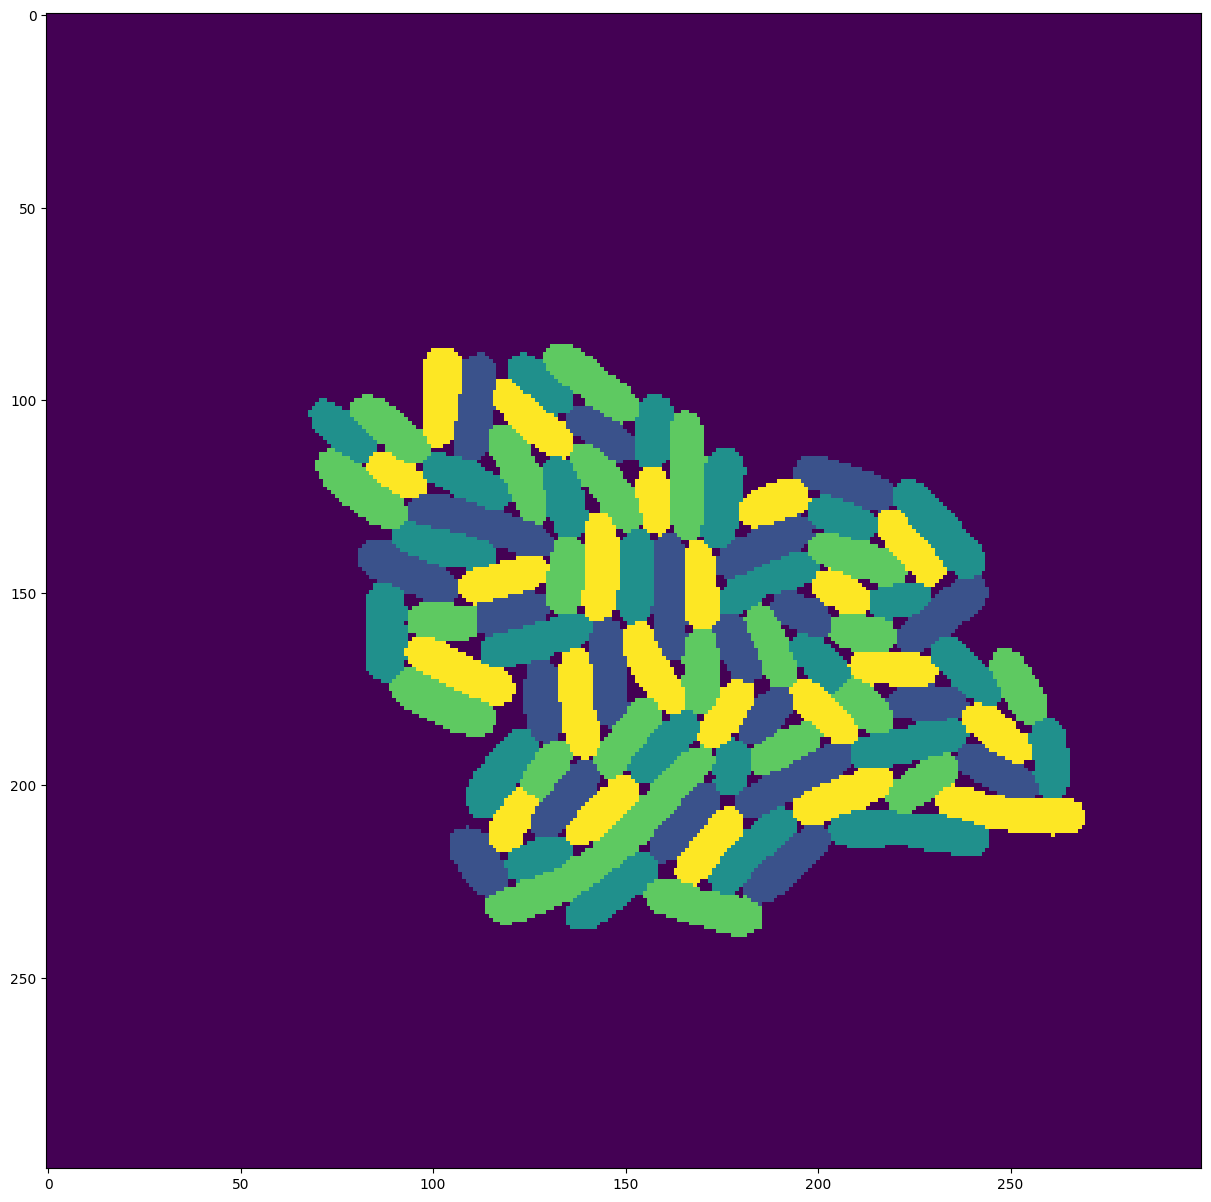

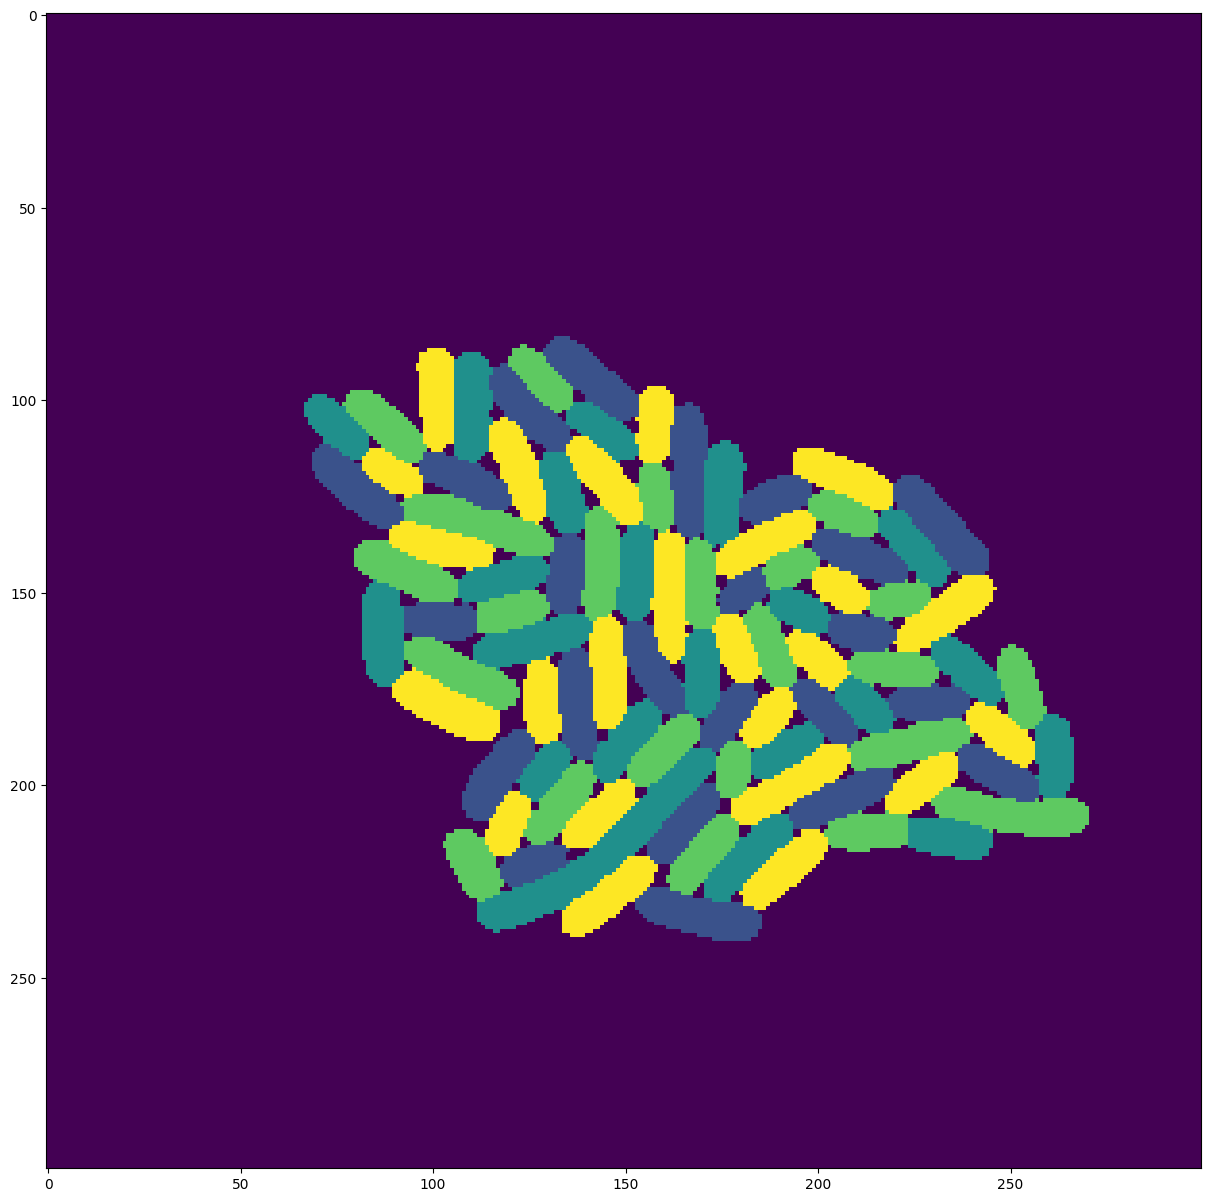

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import ncolor


for hier in hier_arr:
    mask = np.zeros((300,300))
    #print(len(hier.all_nodes()))
    for node in hier.all_nodes():
        if node.index in set(n):
            coordinates = node.value
            x_coords, y_coords = coordinates[:, 0], coordinates[:, 1]
            # Set pixels at specified coordinates to 1
            mask[y_coords, x_coords] = node.index

    ncolor_masks = ncolor.label(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(ncolor_masks)
    plt.show()

In [4]:
total_num

4627

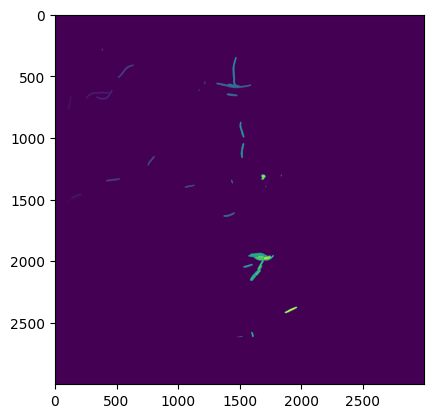

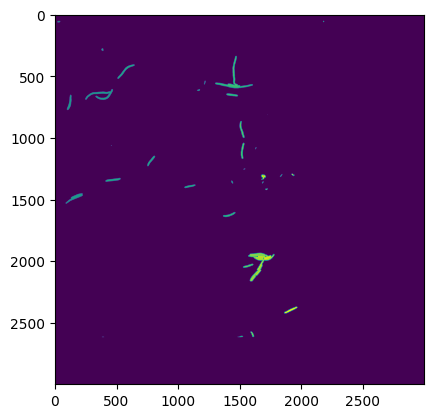

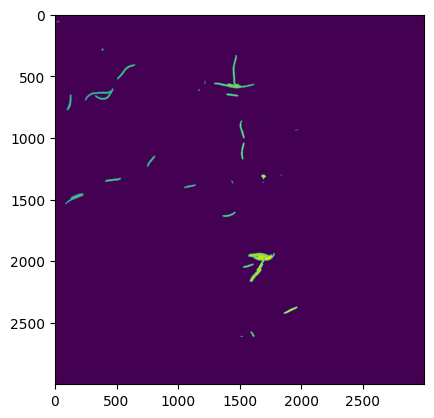

In [6]:
import matplotlib.pyplot as plt
import numpy as np

for hier in hier_arr:
    mask = np.zeros((3000,3000))
    #print(len(hier.all_nodes()))
    for node in hier.all_nodes():
        coordinates = node.value
        x_coords, y_coords = coordinates[:, 0], coordinates[:, 1]
        # Set pixels at specified coordinates to 1
        mask[y_coords, x_coords] = node.index

    plt.imshow(mask)
    plt.show()

In [ ]:
from collections import deque
queue = deque([1])
queue.extend([])



In [ ]:
for element in queue:
    print(element)

In [ ]:
len((3,4,5,6,6))

In [ ]:
from core import process, ModelEnum
process("/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase")

In [ ]:
from scipy.sparse import coo_matrix

# Example COO matrices with different coordinate ranges
matrix_A = coo_matrix([[1, 2], [0, 3], [-100, 2]])  # Shape: (2, 2)
matrix_B = coo_matrix([[1, 0], [-100, 100], [2, 2]])  # Shape: (3, 2)

matrix_A.shape
# Perform multiplication
result = matrix_A.dot(matrix_B)
# The resulting matrix's coordinate range will encompass the union of the coordinate ranges
print("Resulting matrix shape:", result.shape)
print("Resulting matrix (in COO format):\n", result)


In [ ]:

matrix_B.shape

In [ ]:
from scipy.sparse import coo_matrix

# Example data for mask 1 and mask 2 (Replace this with your actual data)
mask_data_1 = [(0, 0, 1), (1, 1, 1)]  # Example data: (row_index, col_index, value)
mask_data_2 = [(0, 0, 1), (2, 2, 1)]

# Create sparse matrices for masks 1 and 2
mask_1 = coo_matrix((data, (row_indices, col_indices)), shape=(mask_shape_1[0], mask_shape_1[1]))
mask_2 = coo_matrix((data, (row_indices, col_indices)), shape=(mask_shape_2[0], mask_shape_2[1]))

# Calculate overlap
overlap = (mask_1.multiply(mask_2)).sum()


In [ ]:
from scipy.sparse import csr_matrix
import numpy as np

# Function to create a sparse matrix representation of the mask
def create_sparse_mask(mask):
    # Get the non-zero indices of the mask
    nonzero_indices = np.transpose(np.nonzero(mask))
    
    # Extract row and column indices
    row_indices, col_indices = nonzero_indices[:, 0], nonzero_indices[:, 1]
    
    # Create a sparse matrix using Compressed Sparse Row (CSR) format
    sparse_mask = csr_matrix((np.ones(len(row_indices)), (row_indices, col_indices)), shape=mask.shape)
    
    return sparse_mask

# Function to calculate the overlap between two sparse masks
def calculate_overlap(mask1, mask2):
    # Multiply the sparse matrices to find the intersection
    intersection = mask1.multiply(mask2)
    
    # Calculate the number of overlapping pixels
    overlap_count = intersection.sum()
    
    return overlap_count

# Example masks (replace these with your actual masks)
mask1 = np.array([
    [1, 0, 1],
    [0, 0, 0],
    [0, 0, 0]
])

mask2 = np.array([
    [1, 0, 1],
    [0, 0, 0],
    [0, 0, 0]
])

# Create sparse representations of masks
sparse_mask1 = create_sparse_mask(mask1)
sparse_mask2 = create_sparse_mask(mask2)

# Calculate overlap between the masks
overlap = calculate_overlap(sparse_mask1, sparse_mask2)
print("Overlap between the masks:", overlap)


In [ ]:
[2,3,4] == [3,4,2]

In [ ]:
set = ()

In [ ]:
sub_coords = np.array([[1, 2], [2, 3], [2, 4], [1, 3]])
bound = np.vstack((np.min(sub_coords, axis=0), np.max(sub_coords, axis=0)))


In [ ]:
sub_coords = np.array([[-10, -1], [-10, -2], [-2, -4], [-1, -100]])
bound2 = np.vstack((np.min(sub_coords, axis=0), np.max(sub_coords, axis=0)))

In [ ]:
bound

In [ ]:
bound2

In [ ]:
def check_overlap(box1, box2):
    # Check for overlap in each dimension
    for i in range(len(box1)):
        # Check if the boxes overlap in the ith dimension
        if box1[i][1] < box2[i][0] or box1[i][0] > box2[i][1]:
            return False  # No overlap in this dimension
    
    return True  # Overlap in all dimensions

In [ ]:
check_overlap(bound, bound2)

In [ ]:
set(sub_coords)

In [3]:
from mip import Model, CBC

In [4]:
import gurobipy as gp
from gurobipy import GRB

ModuleNotFoundError: No module named 'gurobipy'